# Problem Statement:

Income inequality remains a crucial issue, often influenced by factors such as education, occupation, gender, and work hours. To address this, we aim to analyze the U.S. Census Income dataset, exploring which demographic and economic characteristics are most strongly associated with income levels above or below 50,000 Dollars annually, The goal of this project is to analyze and understand the characteristics that differentiate high-income individuals (earning more than $50K) from those earning less. Through exploratory data analysis (EDA), we aim to uncover trends and patterns related to age, education, work hours and other demographic features. Additionally, hypothesis testing will be employed to assess the significance of key variables and determine if certain demographic factors (e.g., education level, marital status and work hours) have a statistically significant effect on income levels.

# Objectives:

The objective of this analysis is to identify and quantify the primary factors influencing income levels within the U.S. population using the census income dataset. By examining the relationships between income and key demographic, educational, and occupational variables, this study aims to determine the strongest income drivers, such as education, work hours, and occupation, while uncovering income disparities across various groups based on workclass, education, age, and marital status. The findings will provide actionable insights for policymakers, workforce development agencies, and businesses to design targeted interventions, including tailored training programs, equitable economic policies, and employment initiatives that enhance income opportunities and promote economic mobility.

# Dataset

The Census Income dataset, also known as the Adult dataset, is a popular dataset derived from the 1994 U.S. Census, commonly used for classification tasks in data science. It consists of various demographic, economic, and educational attributes about individuals, providing insights into factors that may influence income levels. The target variable in this dataset is income, which categorizes individuals based on whether their annual income exceeds $50,000 (>50K) or not (<=50K). The features include demographic attributes such as age, sex, race, marital-status, and native-country, as well as economic and educational details like education, occupation, workclass, hours-per-week, capital-gain, and capital-loss. Each attribute offers a unique perspective on a person’s background, education level, employment type, and income-generating activities, providing a comprehensive view of potential income influencers. The dataset includes both continuous and categorical variables, and missing values in some attributes may require data cleaning. The Census Income dataset is valuable for exploring patterns in income distribution, testing hypotheses around income inequality, and building predictive models to classify income levels based on a range of personal and professional factors.

# Importing Libraries

In [1]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid") 
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest 
from scipy.stats import chi2_contingency  

# Loading the data

In [2]:
df = pd.read_csv(r"C:\Users\lakshya sikri\Documents\adult.csv")

# Dataframe

In [3]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,68,?,HS-grad,12,Widowed,?,Not-in-family,White,Female,4079,2489,49,United-States,<=50K
1,68,Private,HS-grad,6,Widowed,Exec-managerial,Not-in-family,White,Female,5552,3715,37,United-States,<=50K
2,66,?,Some-college,5,Widowed,?,Unmarried,Black,Female,4983,2346,50,United-States,<=50K
3,54,Private,7th-8th,5,Divorced,Machine-op-inspct,Unmarried,White,Female,5330,2712,48,United-States,<=50K
4,41,Private,Some-college,5,Separated,Prof-specialty,Own-child,White,Female,4406,3442,49,United-States,<=50K


In [4]:
df.tail()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,Some-college,5,Never-married,Protective-serv,Not-in-family,White,Male,6009,2658,41,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,5623,3849,39,United-States,<=50K
32558,40,Private,HS-grad,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5950,2505,35,United-States,>50K
32559,58,Private,HS-grad,10,Widowed,Adm-clerical,Unmarried,White,Female,6191,1936,42,United-States,<=50K
32560,22,Private,HS-grad,12,Never-married,Adm-clerical,Own-child,White,Male,4148,1501,47,United-States,<=50K


# Findings

In [5]:
# datatypes of the data
df.dtypes

age                int64
workclass         object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
# Convert object dtype columns to category dtype
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Check memory usage before and after conversion
print("Memory usage after conversion:")
print(df.memory_usage(deep=True))

Memory usage after conversion:
Index                132
age               260488
workclass          33462
education          34148
education.num     260488
marital.status     33353
occupation         34163
relationship       33131
race               33069
sex                32793
capital.gain      260488
capital.loss      260488
hours.per.week    260488
native.country     36362
income             32792
dtype: int64


In [8]:
df.dtypes

age                  int64
workclass         category
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object

# Duplicate rows

In [9]:
# Display initial dataset shape
print("Initial shape of the dataset:", df.shape)

# Drop duplicate rows and display the updated shape
initial_rows = df.shape[0]
df = df.drop_duplicates(keep='first')
rows_dropped = initial_rows - df.shape[0]

print("Shape after dropping duplicates:", df.shape)
print("Number of duplicate rows dropped:", rows_dropped)

Initial shape of the dataset: (32561, 14)
Shape after dropping duplicates: (32561, 14)
Number of duplicate rows dropped: 0


In [10]:
# Remove any spaces in the column names and update the DataFrame
df.columns = [col.replace(' ', '') for col in df.columns]
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [11]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [12]:
df['capital.loss'].value_counts()

capital.loss
1284    24
3065    24
2959    23
3092    23
1780    22
        ..
1814     3
1660     2
2960     2
3492     2
1006     1
Name: count, Length: 2901, dtype: int64

In [13]:
df['capital.gain'].value_counts()

capital.gain
5244    23
4232    22
5343    22
6876    21
6255    21
        ..
6503     2
5929     2
6617     2
4235     2
4633     2
Name: count, Length: 3001, dtype: int64

In [14]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [15]:
df['age'].nunique()

59

In [16]:
# check for missing values
df.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

The dataset contains absolutely no null values! Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns. There are no Float Datatypes in the dataset. Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.

In [17]:
df[df['native.country'] == '?'].shape

(583, 14)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.472314,13.346375,17.0,28.0,37.0,48.0,90.0
education.num,32561.0,8.513467,2.286245,5.0,7.0,9.0,11.0,12.0
capital.gain,32561.0,5463.869752,867.342736,3950.0,4713.0,5473.0,6218.0,6950.0
capital.loss,32561.0,2402.672829,836.424835,950.0,1679.0,2409.0,3128.0,3850.0
hours.per.week,32561.0,39.975431,6.059153,30.0,35.0,40.0,45.0,50.0


The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 38. The minimum and maximum years spent on education is 5 and 12 respectively, whereas the mean education level is 10 years. While the minimum and average capital gain is 3950, maximum is 6950, The number of hours spent per week varies between 30 to 50 and the average being 39 hours.

In [19]:
# Each column to check for '?' values
for col in df.columns:
    count = df[col].value_counts().get('?', 0)
    print(f"The count of '?' in {col}: {count}")

The count of '?' in age: 0
The count of '?' in workclass: 1836
The count of '?' in education: 0
The count of '?' in education.num: 0
The count of '?' in marital.status: 0
The count of '?' in occupation: 1843
The count of '?' in relationship: 0
The count of '?' in race: 0
The count of '?' in sex: 0
The count of '?' in capital.gain: 0
The count of '?' in capital.loss: 0
The count of '?' in hours.per.week: 0
The count of '?' in native.country: 583
The count of '?' in income: 0


Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of '?' values in our dataset. We will have to replace those values!

In [20]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   education       32561 non-null  category
 3   education.num   32561 non-null  int64   
 4   marital.status  32561 non-null  category
 5   occupation      30718 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital.gain    32561 non-null  int64   
 10  capital.loss    32561 non-null  int64   
 11  hours.per.week  32561 non-null  int64   
 12  native.country  31978 non-null  category
 13  income          32561 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.5 MB


We can see that the columns workclass, occupation, and native.country contains null values. We would have to find out a way to deal with them! There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!



In [21]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education       32561 non-null  category
 3   education.num   32561 non-null  int64   
 4   marital.status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital.gain    32561 non-null  int64   
 10  capital.loss    32561 non-null  int64   
 11  hours.per.week  32561 non-null  int64   
 12  native.country  32561 non-null  category
 13  income          32561 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.5 MB


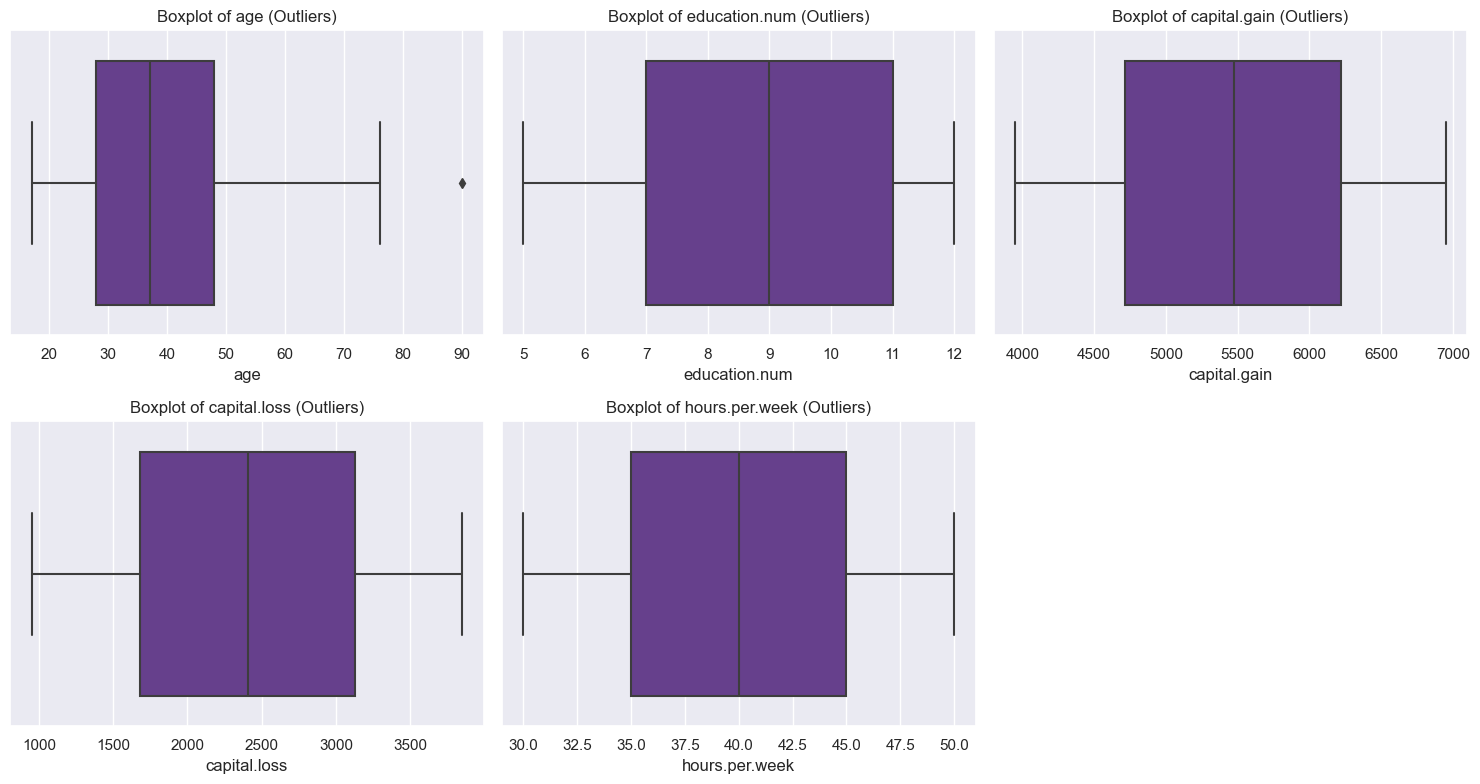

In [23]:
# List of columns to check for outliers
numeric_columns = [ 'age','education.num', 'capital.gain', 'capital.loss','hours.per.week']

# outliers - Visualize
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, color='rebeccapurple', x=col)
    plt.title(f'Boxplot of {col} (Outliers)')
plt.tight_layout()
plt.show()

We are keeping the outliers. Since it’s census data, outliers often represent legitimate, real-world diversity. Dropping them risks losing valuable information, especially in a socioeconomic dataset where extremes like income, work hours And Capital Gain may be relevant to your analysis.

This approach also simplifies things—you won’t need extra preprocessing, and your results will reflect the full range of the population.

In [24]:
list_col=  df.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(df[list_col[i]].value_counts())

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
?                       0
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      

# Exploratory Data Analysis

  # Univariate Analysis

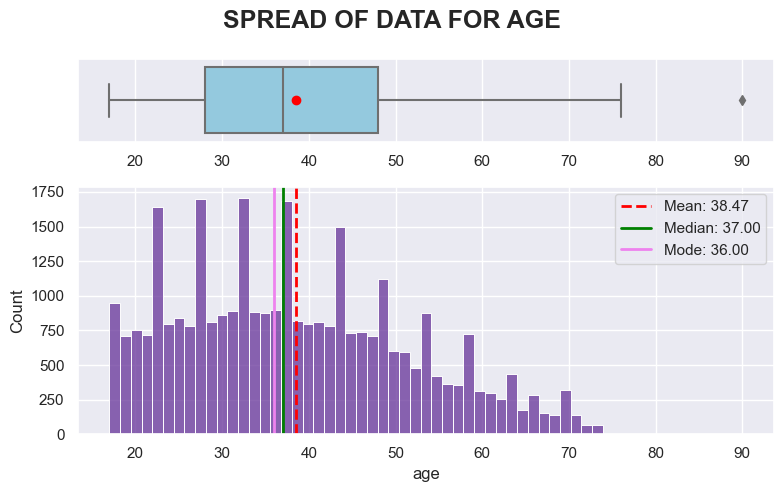

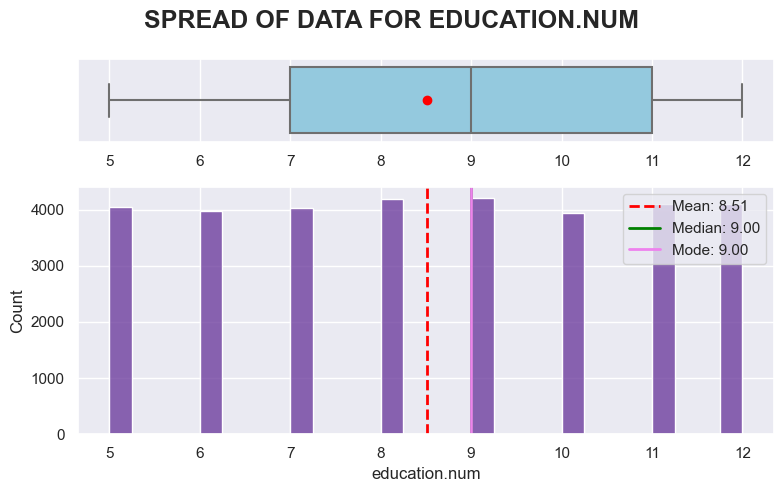

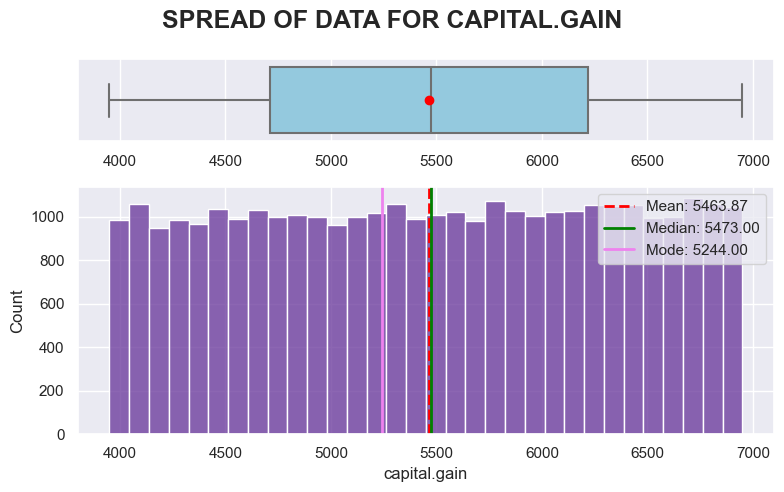

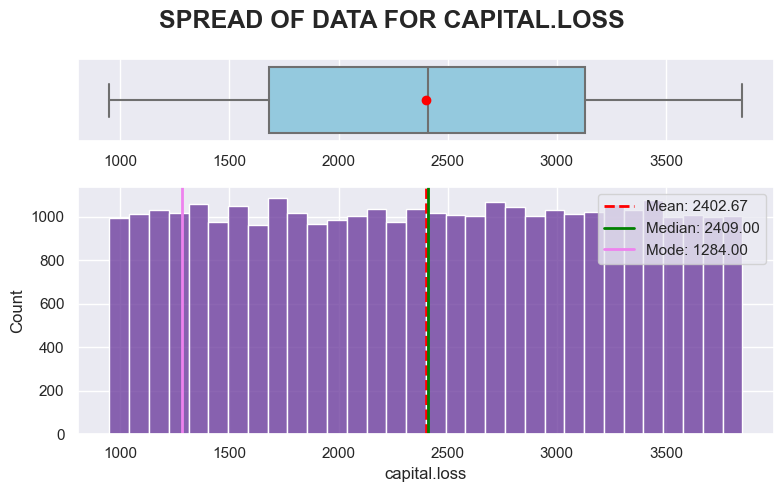

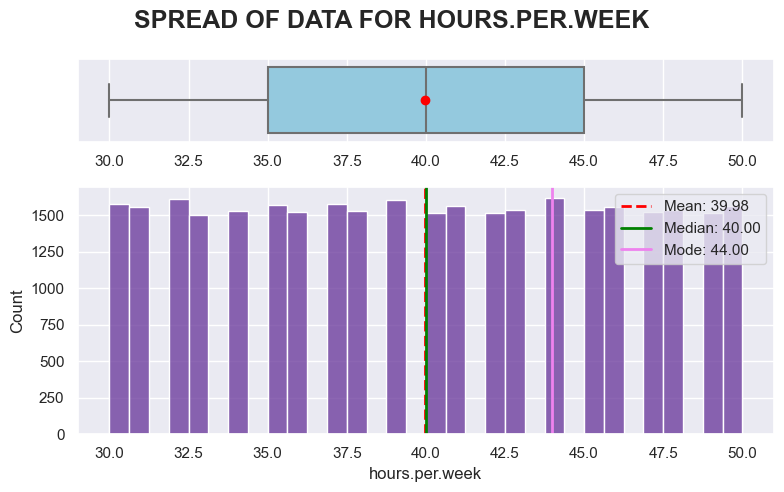

In [25]:
def dist_box(data):
    """
    Plots a combined boxplot and histogram for univariate analysis of a continuous variable.
    Shows spread, central tendency, dispersion, and outliers.
    """
    # Extracting the column name in uppercase
    Name = data.name.upper()

    # Set up the subplots
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(8, 5))

    # Calculating mean, median, and mode
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]

    # Setting title
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')

    # Plotting boxplot
    sns.boxplot(x=data, showmeans=True, orient='h', ax=ax_box, color='skyblue', meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"})
    ax_box.set(xlabel='')

    # Plotting histogram
    sns.histplot(data, kde=False, color='rebeccapurple', ax=ax_dis)

    # Adding lines for mean, median, and mode to check spread, central tendency
    ax_dis.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    ax_dis.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
    ax_dis.axvline(mode, color='violet', linestyle='-', linewidth=2, label=f'Mode: {mode:.2f}')

    # Adding legend
    ax_dis.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Apply dist_box to each numerical column in the DataFrame
list_col = df.select_dtypes(include=['number']).columns

for col in list_col:
    dist_box(df[col])

# Observation

The age of individuals in the dataset lies approximately between 20 to 90, with an average age around 40. Most individuals are in their late teens or 20s.

The work hours per week column has a normal distribution, with an average around 39 hours.

Capital gain in the dataset lies approximately between 4000 to 7000 , with average around 5500, and a small subset reporting significant values.

Capital loss in the dataset lies approximately between 1000 to 3500 , with average around 2400, and a small subset reporting significant values.

The dataset shows a wide variety of education levels and corresponding education years, with education levels ranging across high school, college, and advanced degrees. Most individuals have a high school level of education.


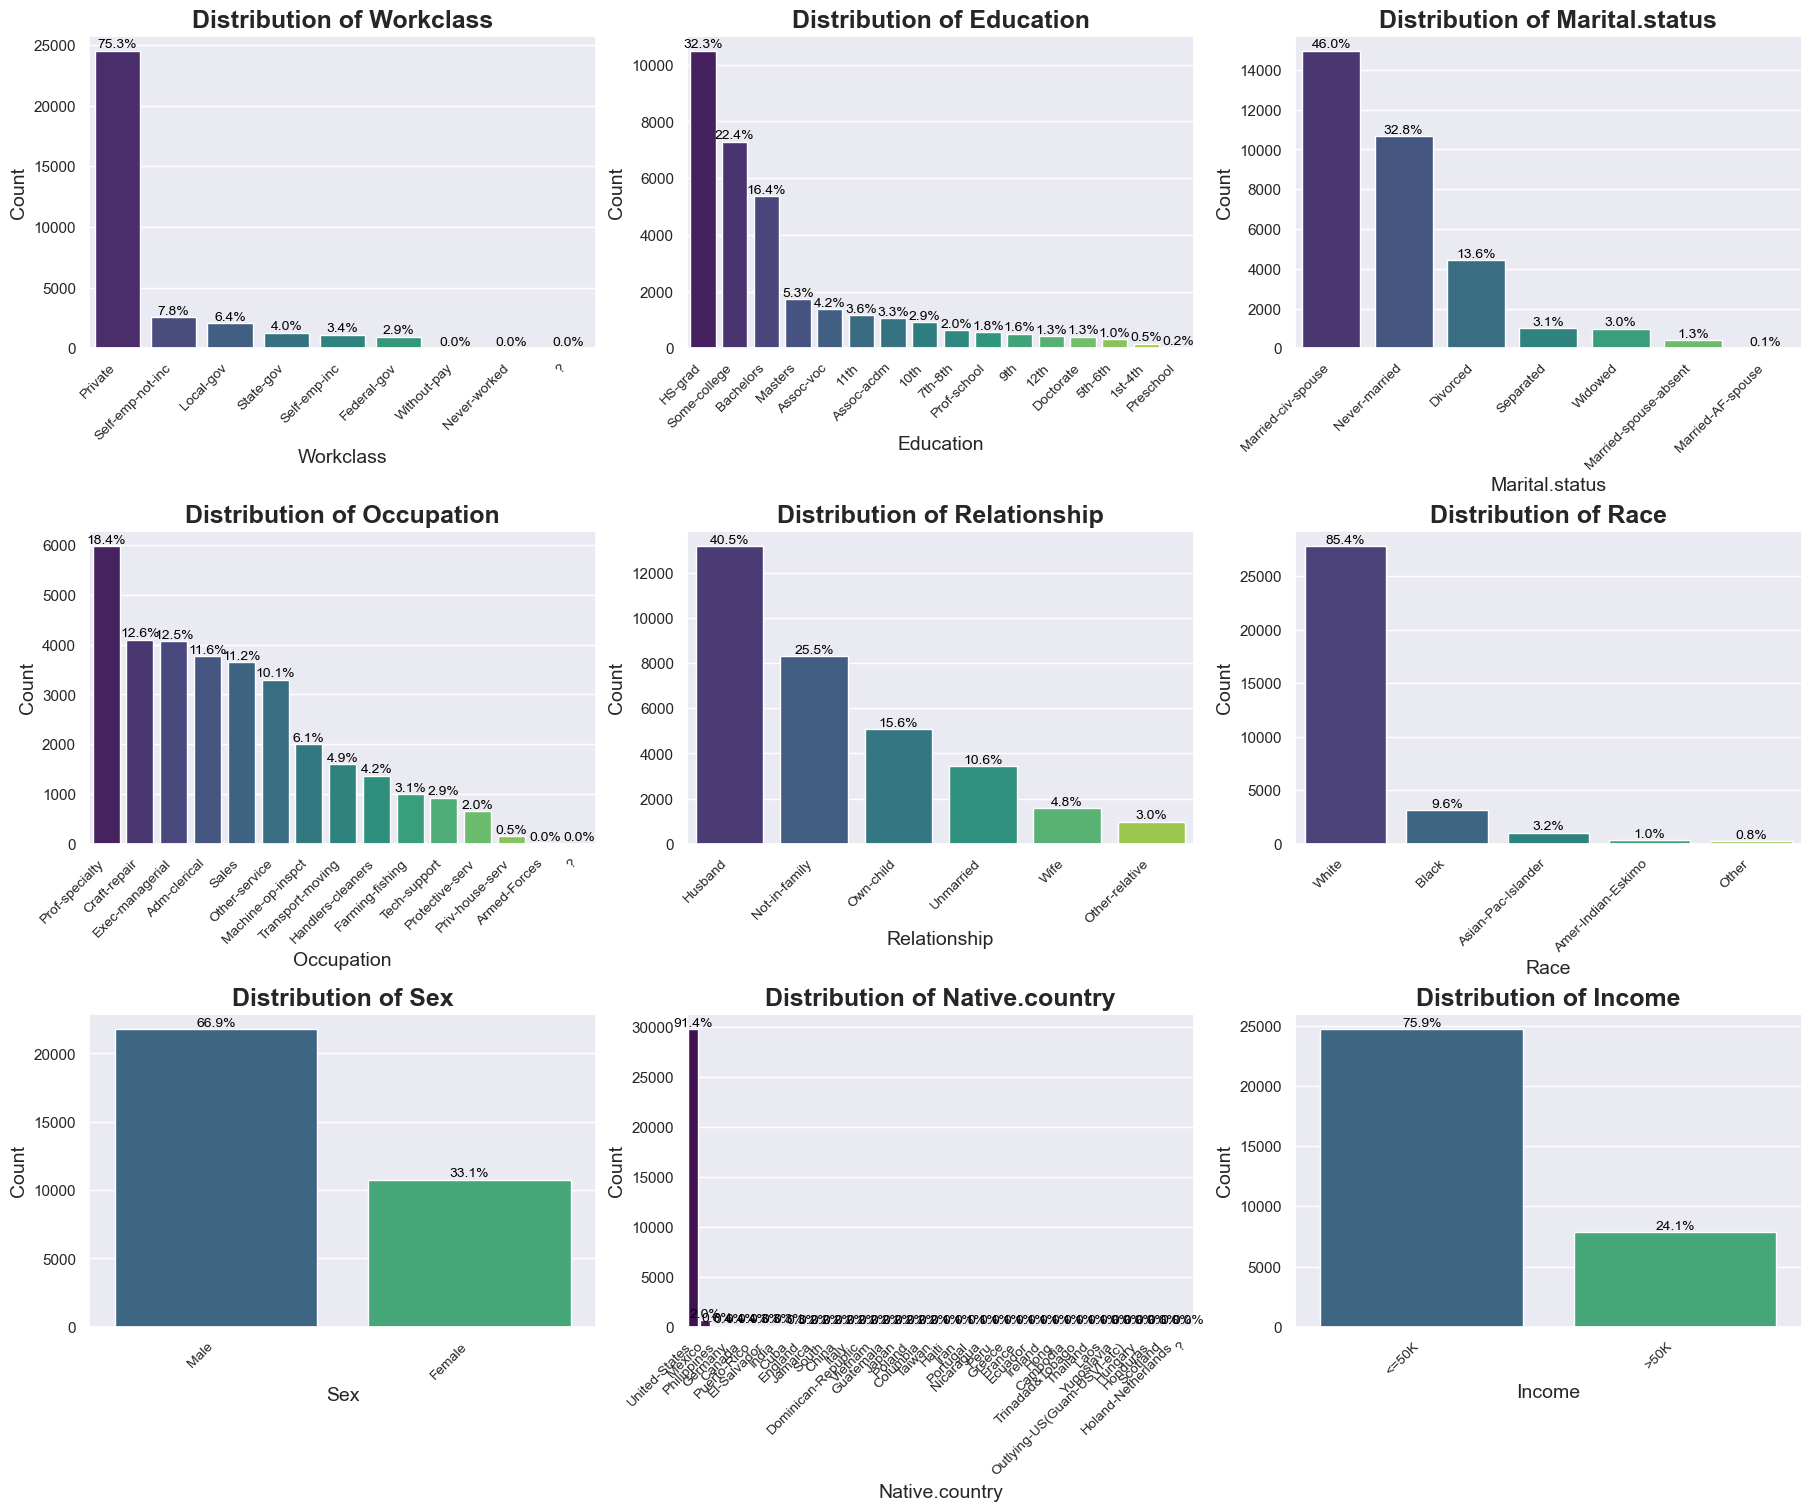

In [26]:
def bar_perc(plot, feature):
    total = len(feature)
    for p in plot.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        plot.annotate(percentage, (x, y), size=10, ha='center', va='bottom', color='black')  # Annotation font size

# Select all categorical columns
list_col = df.select_dtypes(['category']).columns

# Set the number of columns and calculate rows needed based on number of categorical variables
num_plots = len(list_col)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols 

# Define figure size based on number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Style customization
sns.set_theme(style="whitegrid")

# Create bar plots for each categorical variable
for i, col in enumerate(list_col):
    order = df[col].value_counts(ascending=False).index
    plot = sns.countplot(x=col, data=df, order=order, ax=axes[i], palette='viridis')
    
    # Title and axis customization
    plot.set_title(f"Distribution of {col.capitalize()}", fontsize=18, fontweight='bold')
    plot.set_xlabel(col.capitalize(), fontsize=14)
    plot.set_ylabel('Count', fontsize=14)
    
    # Add percentage annotations
    bar_perc(plot, df[col])
    
    # Rotate x-axis labels for readability if many categories
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    
# Remove any unused axes if fewer plots than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


# Observation

The dataset contains approximately numbers of males of (66.9%) and females (33.1%), indicating an even gender distribution among individuals.

The workclass column indicates a wide variety of employment types, with a notable portion of individuals working in the private sector, while others are in government or self-employed positions. A small percentage report "Never-worked" or "Without-pay" categories.

Education levels range from those without a high school diploma to advanced degrees. The average education.num (years of education) shows most individuals completed at least high school, with many also having some college education or a bachelor’s degree.

Individuals are fairly evenly distributed across different countries of origin, with the United States being the most represented (~91.4%), and other countries contributing roughly equally at around 8.6%.

Native country indicates most individuals are from the United States, with others from various other countries, showing a diverse geographic representation.

Most individuals do not have children, which is reflected in relationship categories with many individuals listed as "Not-in-family" or "Unmarried."

Additionally, the majority of individuals work full-time (around 40 hours per week on average), with some reporting higher hours per week.

The income distribution shows two categories, with a significant number of individuals either earning above or below a specified income threshold.


# Bivariate & Multivariate Analysis

In [27]:
cat_columns=df.select_dtypes(['category']).columns
cat_columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

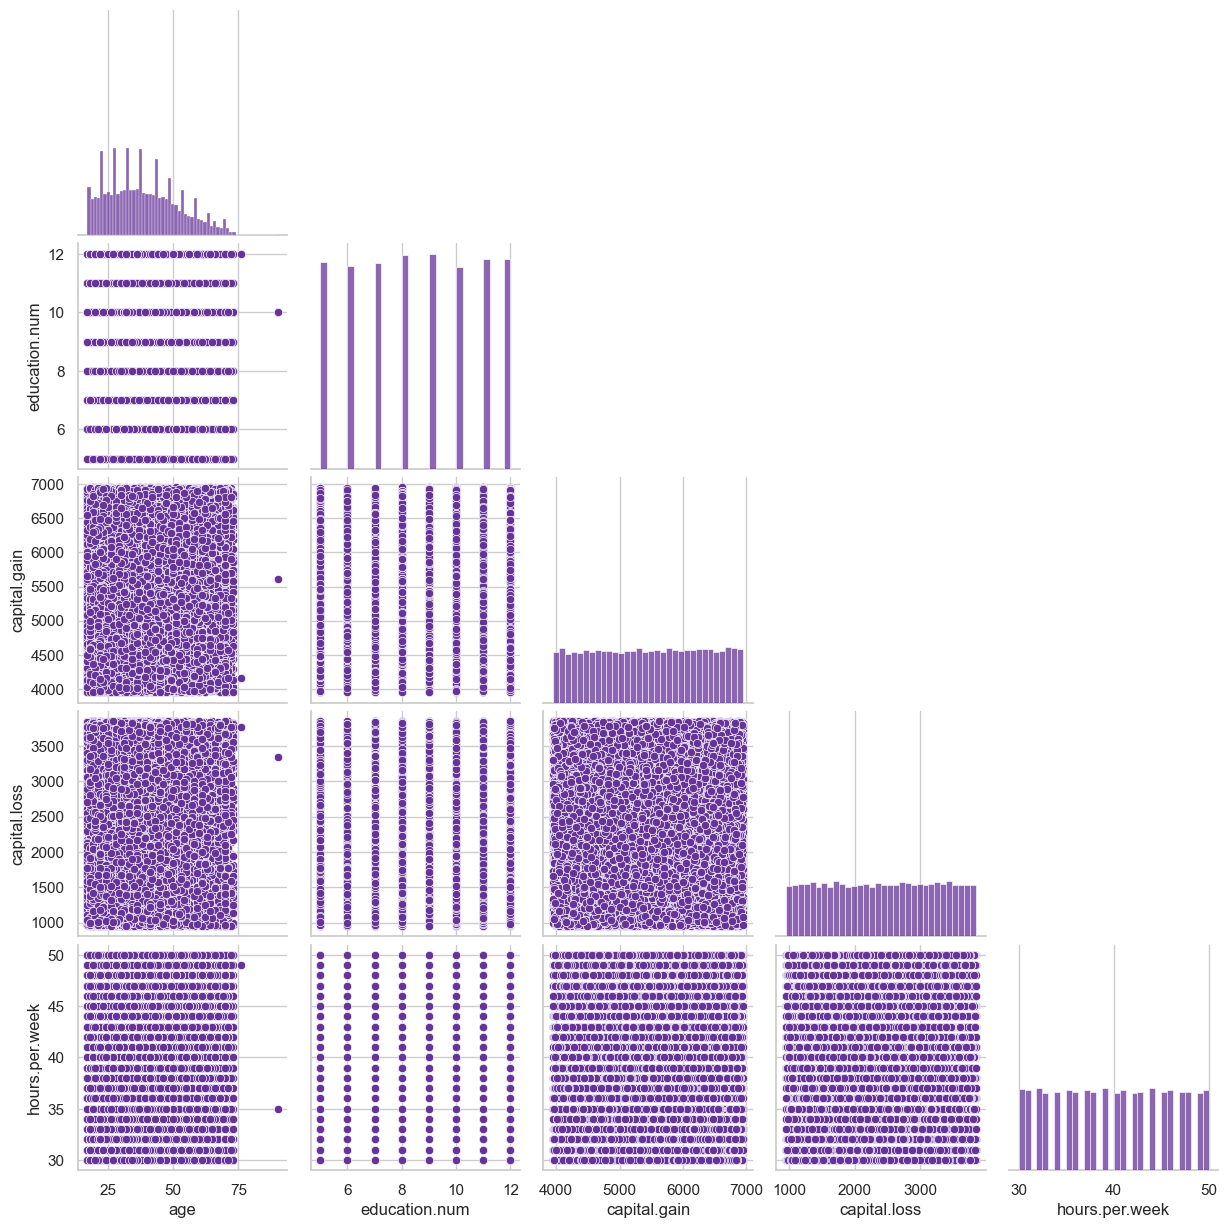

In [28]:
sns.pairplot(data=df, corner=True, plot_kws={'color': 'rebeccapurple'}, diag_kws={'color': 'rebeccapurple'})

# Show the plot
plt.show()

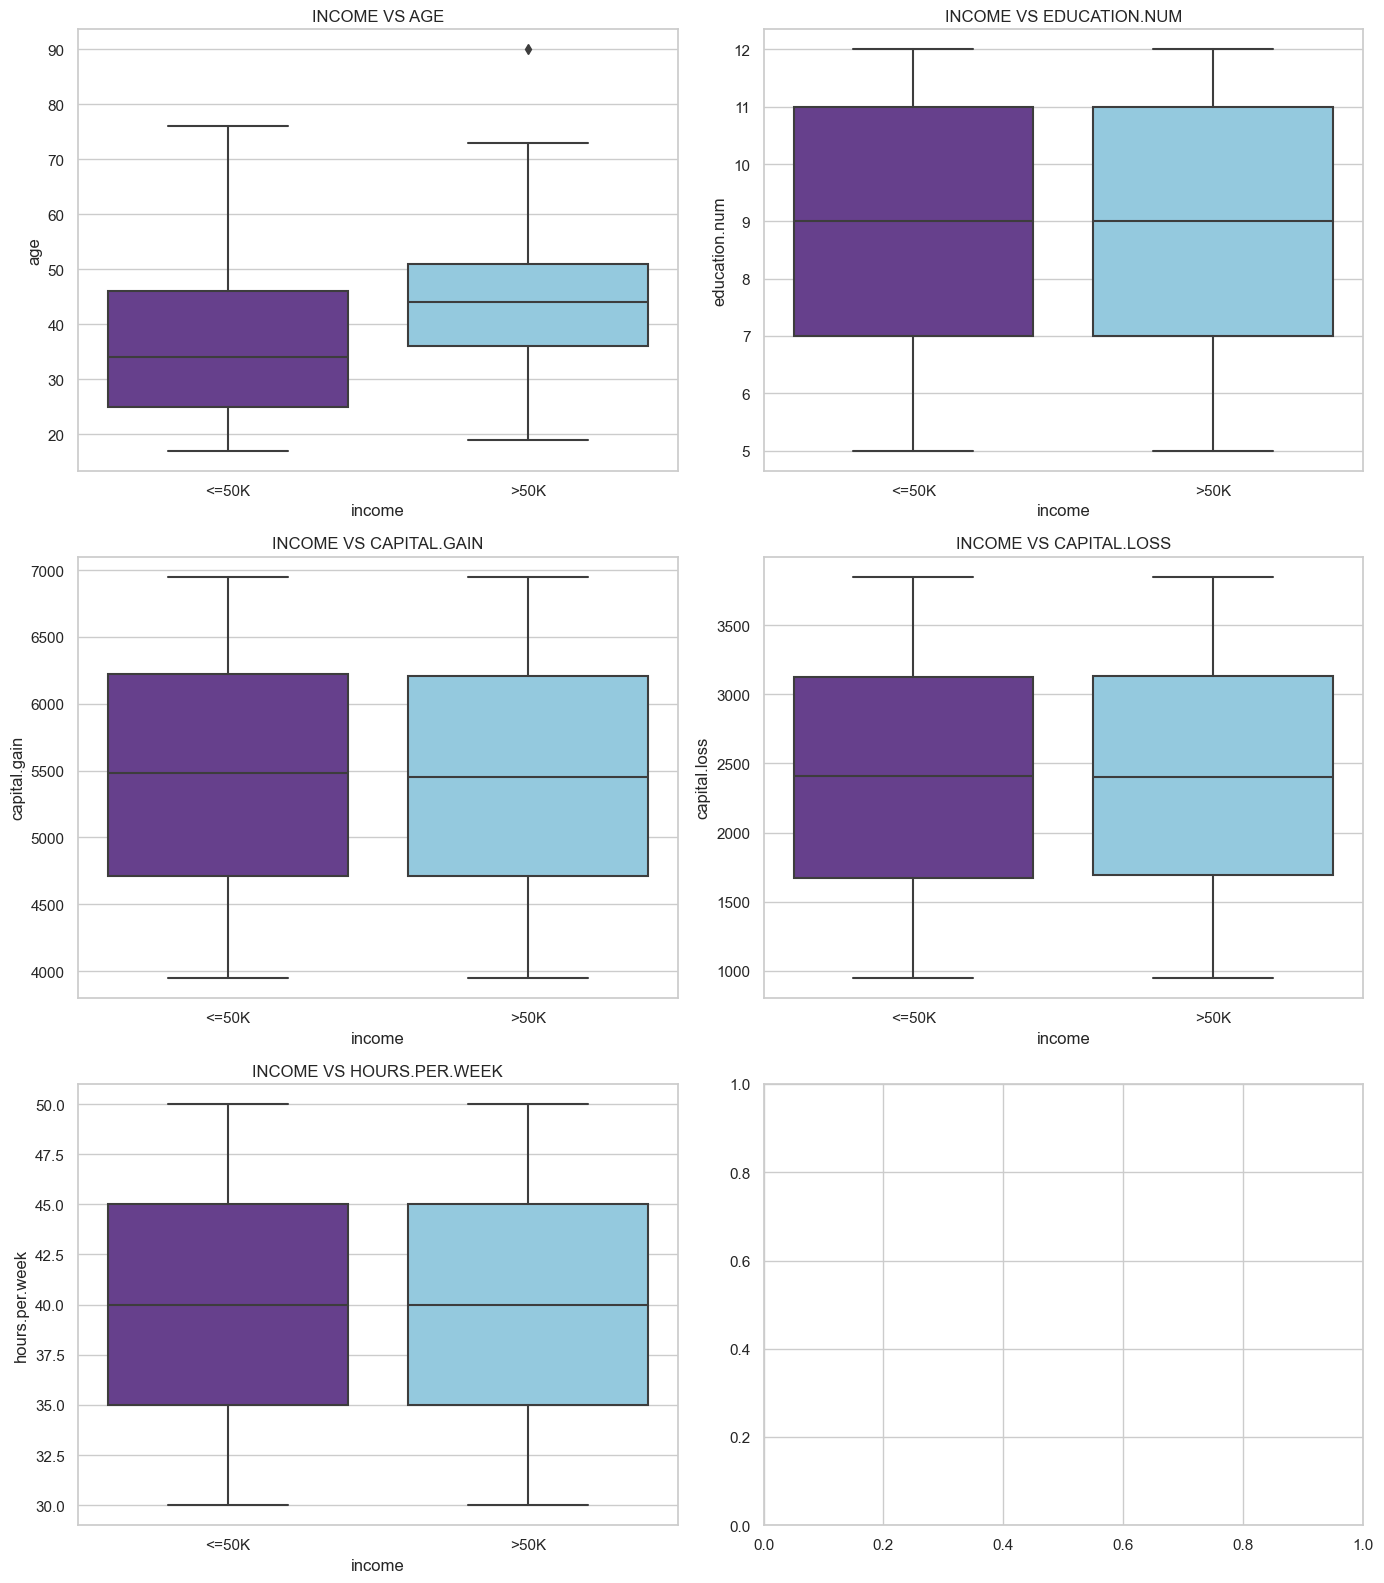

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(14, 16))

# List of numerical columns to plot against a categorical variable
numerical_columns = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_variable = 'income'

palette = [ 'rebeccapurple','skyblue']

# Plot each numerical column against the categorical variable
for i, col_name in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Create a boxplot for each numerical column grouped by the categorical variable
    sns.boxplot(y=df[col_name], x=df[categorical_variable], ax=ax, palette=palette, orient='v')
    ax.set_title(f'{categorical_variable.upper()} VS {col_name.upper()}')

plt.tight_layout()
plt.show()

# Observation

The average age of females is slightly higher than that of males, suggesting that female individuals in the dataset may, on average, be older than male individuals.

The number of children (reflected in family-related attributes) for both male and female individuals appears to be similar, as seen in the relationship and marital status columns, where many individuals are noted as either Not-in-family or Unmarried.

For capital gain and capital loss, male individuals tend to report higher capital gains, resulting in some outliers, while females generally report fewer capital gains or losses. This could imply that males might have higher investment income on average.

The income column shows that male policyholders, on average, incur more costs or earn more than female policyholders. However, there are many outliers for females with high incomes, which may point to greater variability in female earnings.

In terms of work hours per week, both males and females tend to work around 40 hours, with some males working slightly higher hours, which may contribute to variations in income levels.

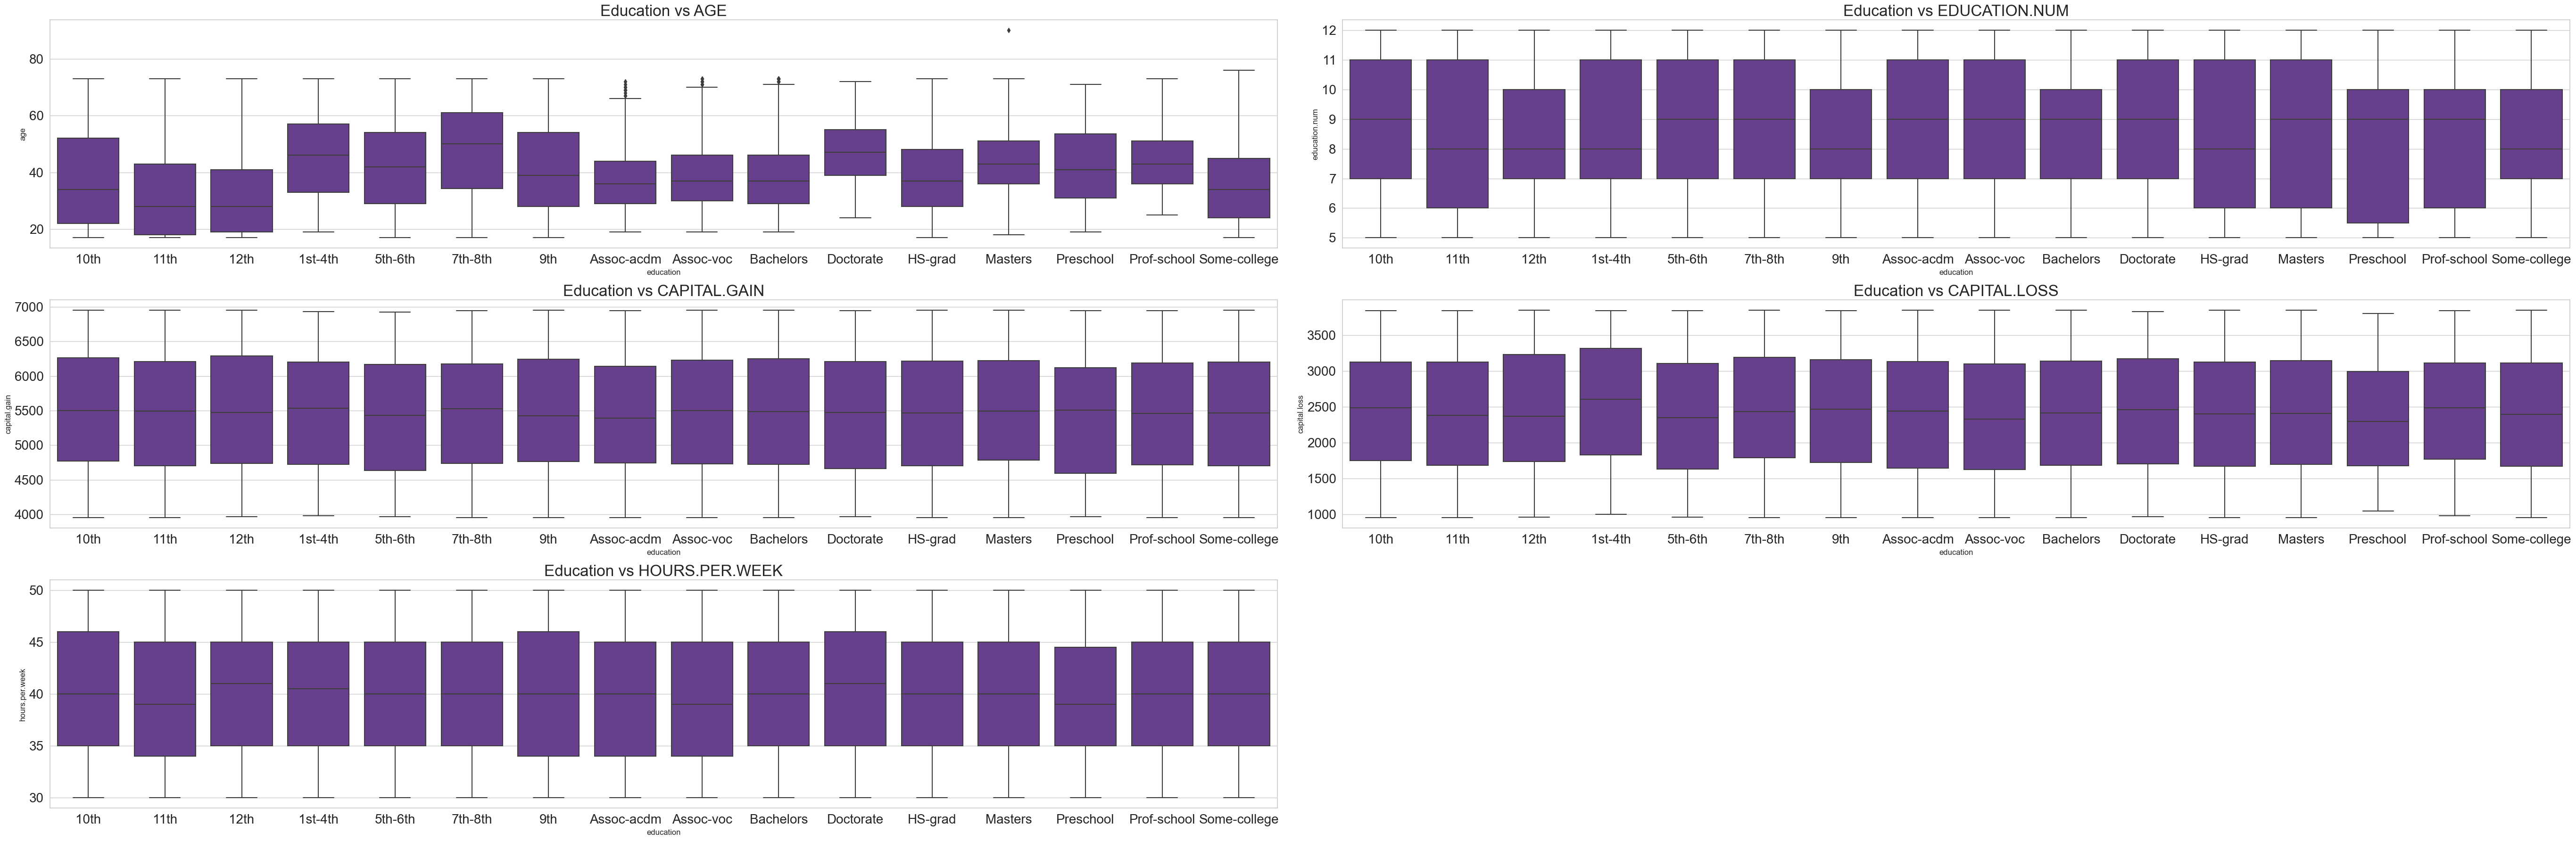

In [30]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
num_cols = len(numerical_columns)

# Define the categorical column for comparison
categorical_column = 'education'

# Calculate rows and columns based on the number of numerical columns
nrows = (num_cols // 2) + (num_cols % 4)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(55, nrows * 6))
axes = axes.flatten() 

# Iterate over numerical columns to create boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[categorical_column], y=df[col], ax=axes[i], palette=["rebeccapurple"]).set(
        title=f'{categorical_column.capitalize()} vs {col.upper()}'
    )
    
    axes[i].tick_params(axis='x', labelsize=20)  
    axes[i].tick_params(axis='y', labelsize=20)

    # Increase the title font siz
    axes[i].title.set_fontsize(24)

# Remove any unused subplots (if num_cols is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for readability
plt.tight_layout()
plt.show()

# Observation

The individuals with higher education levels, such as Doctorate and Masters, tend to be older on average. Education levels like "11th" and "9th" are associated with a younger age distribution.

Capital gain does not show a strong correlation with education levels in terms of a clear trend, as most education levels have a similar range of capital gain values.

This plot shows a strong positive correlation, as expected, since "Education Number" is directly related to education level.

The capital loss boxplot reveals a consistent distribution across education levels, with no noticeable trend as education level changes.

Hours worked per week vary slightly across different education levels, but there is no clear trend suggesting a strong relationship.
Most education levels have a similar range in hours worked, though individuals with higher education (like Masters and Doctorates) show slightly more variation in hours worked, possibly reflecting a mix of full-time and part-time roles.

# What are the differences in marital status distribution between males and females? Are certain marital statuses more common for one gender?

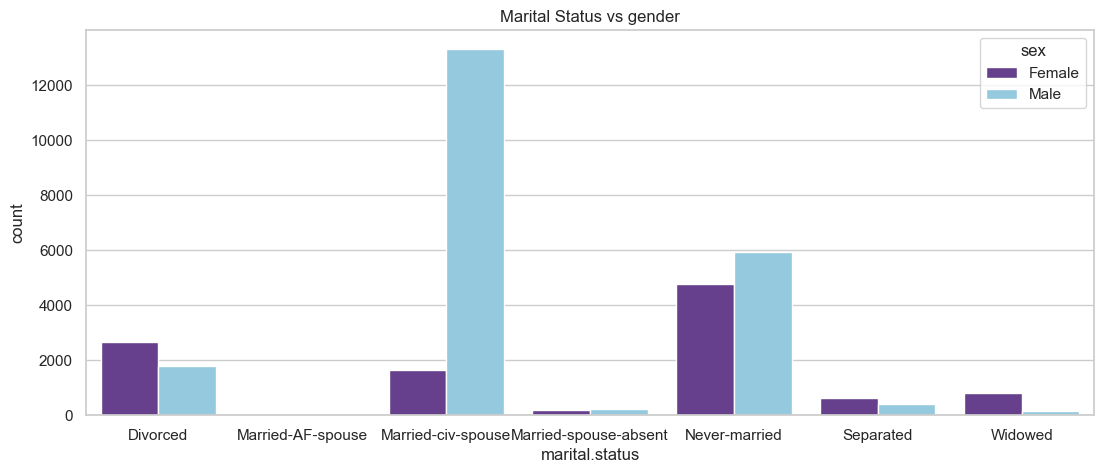

In [31]:
# Create the figure
plt.figure(figsize=(13, 5))

# Plot count of marital status by gender
ax = sns.countplot(x='marital.status', hue='sex', data=df, palette= [ 'rebeccapurple','skyblue'])

# Set the title
ax.set(title="Marital Status vs gender")

# Display the plot
plt.show()

# Observation
Males significantly outnumber females in the Married-civ-spouse category, suggesting a high proportion of married males in this dataset. A large number of individuals fall under the Never-married category, with females and males showing more balanced counts, though males slightly outnumber females. Both Divorced and Separated categories show more females than males, indicating a higher prevalence of these marital statuses among females in this dataset. The Widowed category also shows a slightly higher count of females than males.

# How does the average capital gain compare between males and females?

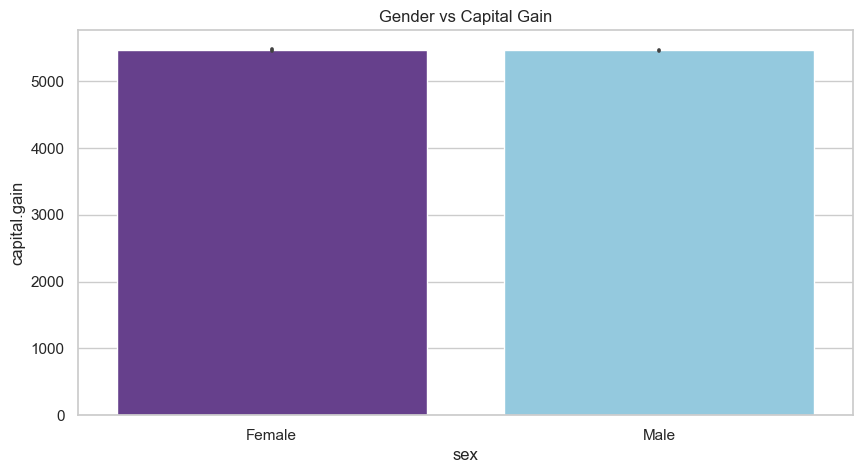

In [32]:
# Create the bar plot 
plt.figure(figsize=(10, 5))
sns.barplot(x='sex', y='capital.gain', palette= [ 'rebeccapurple','skyblue'],data=df).set(title="Gender vs Capital Gain")

# Display the plot
plt.show()

# Observation
The bars represent the mean capital gain for each gender, with Female on the left and Male on the right. The chart shows relatively similar capital gains between genders, with no significant difference between males and females in terms of average capital gain. This indicates that gender may not be a strong factor influencing capital gain in this dataset.

# How does education level impact average capital gain and loss?

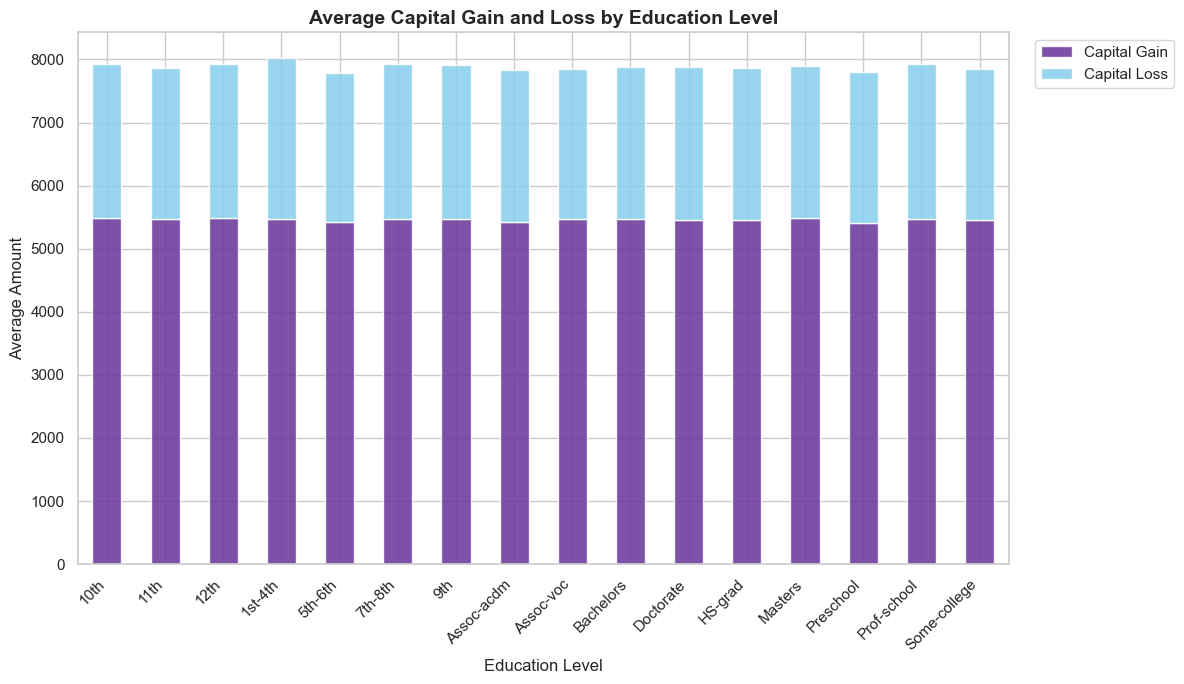

In [33]:
# Prepare data by grouping and averaging capital gain/loss by education level
capital_data = df.groupby('education')[['capital.gain', 'capital.loss']].mean().reset_index()

# Plot a stacked bar plot
fig, ax = plt.subplots(figsize=(12, 7))
capital_data.plot(
    kind='bar', stacked=True, x='education', ax=ax, color=['rebeccapurple', 'skyblue'], alpha=0.85
)

# Set title and axis labels
ax.set_title("Average Capital Gain and Loss by Education Level", fontsize=14, fontweight='bold')
ax.set_xlabel("Education Level", fontsize=12)
ax.set_ylabel("Average Amount", fontsize=12)

# Set legend with custom placement
ax.legend(['Capital Gain', 'Capital Loss'], bbox_to_anchor=(1.02, 1), loc='upper left')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Observation
The average capital gain appears to increase with higher education levels, with the highest average gain observed for individuals with a doctorate degree.
There is a significant jump in average capital gain between the HS-grad and Masters levels.

The average capital loss also seems to increase with education level, but the trend is less pronounced compared to capital gain.
The highest average capital loss is observed for individuals with a HS-grad education level.

# How does education level impact average capital gain?

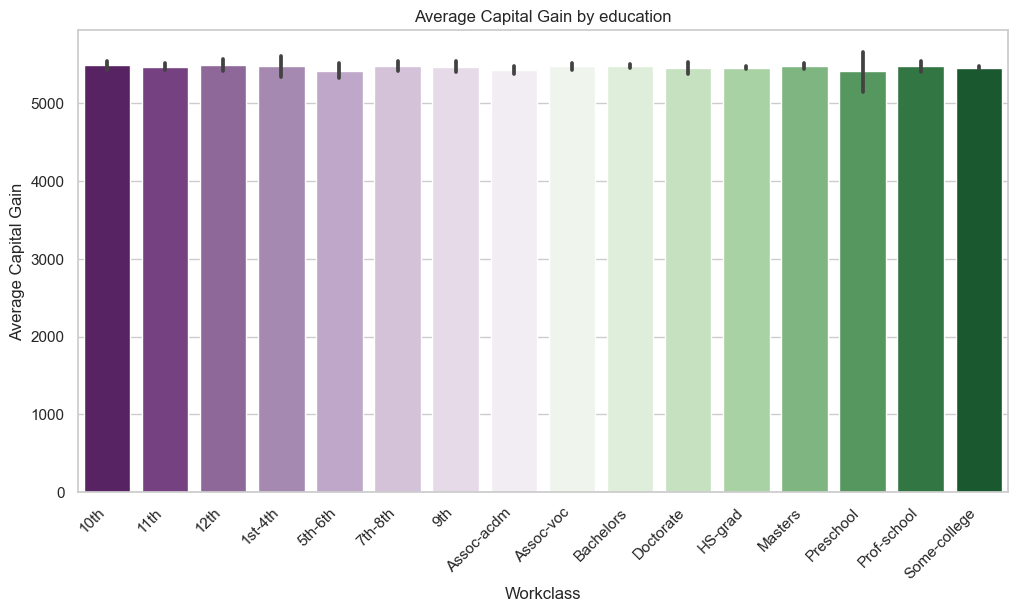

In [34]:
# Create a bar plot of average capital gain by education
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='capital.gain', data= df, estimator='mean', palette='PRGn') \
    .set(title="Average Capital Gain by education", xlabel="Workclass", ylabel="Average Capital Gain")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Observation
The average capital gain appears to increase with higher education levels, with some fluctuations.
Individuals with a Doctorate degree tend to have the highest average capital gain.
Individuals with a Preschool education level tend to have the lowest average capital gain.

# How does race impact average capital gain and loss?

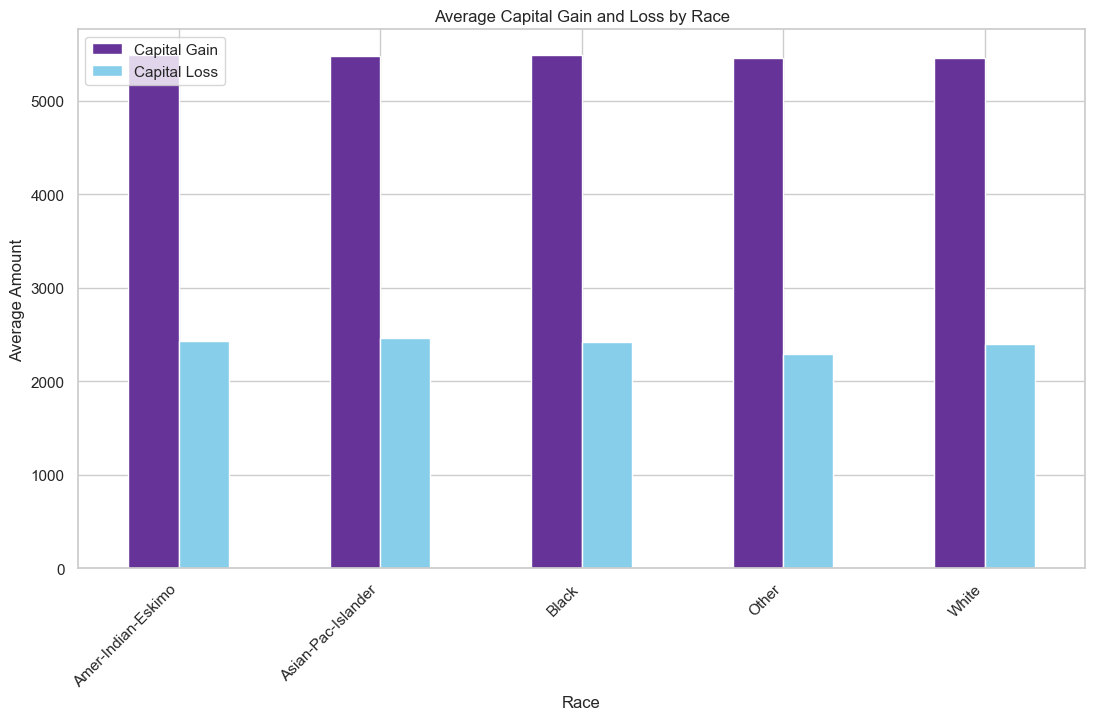

In [35]:
# Group data by race and calculate average capital gain and capital loss
capital_race = df.groupby('race')[['capital.gain', 'capital.loss']].mean().reset_index()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(13, 7))
capital_race.plot(kind='bar', x='race', stacked=False,color=['rebeccapurple', 'skyblue'], ax=ax)
plt.title("Average Capital Gain and Loss by Race")
plt.xlabel("Race")
plt.ylabel("Average Amount")
plt.legend(["Capital Gain", "Capital Loss"], loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

# Observation

There is a significant variation in average capital gain across different racial groups.
The highest average capital gain is observed for individuals with the Amer-Indian-Eskimo race, followed by Other and Asian-Pac-Islander.
The lowest average capital gain is observed for the Black and White racial groups. 

The average capital loss also varies across racial groups.
The highest average capital loss is observed for individuals with the White race, followed by Black.
The lowest average capital loss is observed for the Amer-Indian-Eskimo race

The observed differences in capital gain and loss across racial groups could be due to various factors such as socioeconomic disparities, access to financial resources, and investment opportunities.
Further analysis with additional variables could provide more insights into the factors driving capital gain and loss across different racial groups.

In [36]:
# Group by race and calculate the mean capital loss
avg_capital_loss_by_race = df.groupby('race')['capital.loss'].mean()

# Display the result
print(avg_capital_loss_by_race)

race
Amer-Indian-Eskimo    2432.980707
Asian-Pac-Islander    2460.746872
Black                 2424.908131
Other                 2297.457565
White                 2398.692587
Name: capital.loss, dtype: float64


In [37]:
# Group by hours per week and calculate the mean capital gain
avg_capital_gain = df.groupby('hours.per.week')['capital.gain'].mean()

# Display the result
print(avg_capital_gain)

hours.per.week
30    5439.147562
31    5403.957665
32    5451.774473
33    5467.728181
34    5459.015717
35    5477.312500
36    5522.124016
37    5518.394921
38    5464.022193
39    5434.917603
40    5488.830363
41    5464.068327
42    5473.323860
43    5465.115234
44    5445.523839
45    5440.108653
46    5447.812821
47    5448.351475
48    5489.758801
49    5473.853933
50    5470.060664
Name: capital.gain, dtype: float64


# How does education impact income distribution?

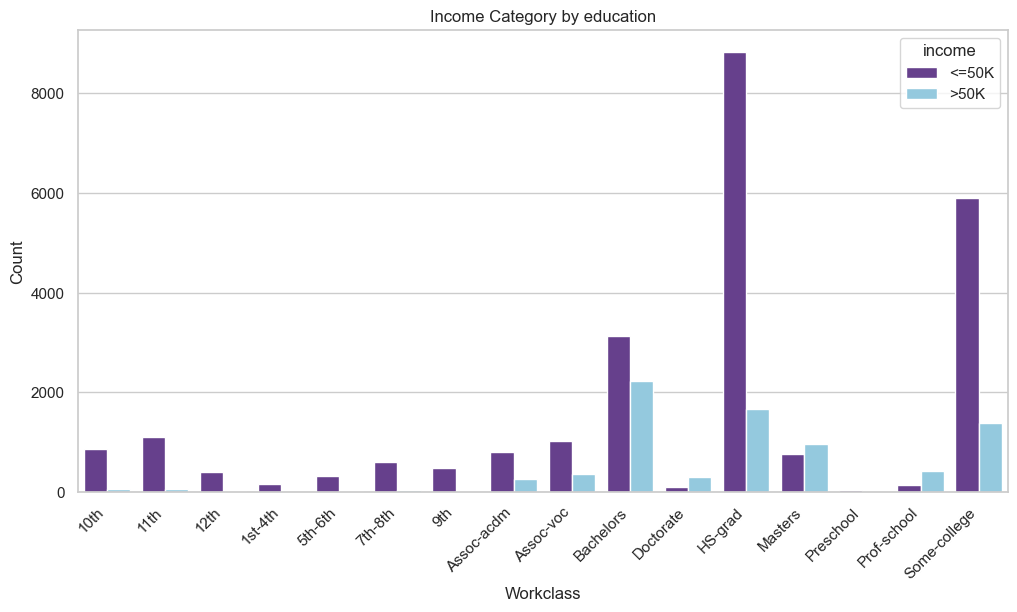

In [38]:
# Create a count plot of income by education
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=df, palette=['rebeccapurple', 'skyblue']) \
    .set(title="Income Category by education", xlabel="Workclass", ylabel="Count")

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Observation
Higher education levels might be associated with higher-paying jobs and career opportunities, leading to higher income levels.
Lower education levels might be associated with lower-paying jobs and limited career advancement opportunities.

# How does education level impact the average number of hours worked per week?

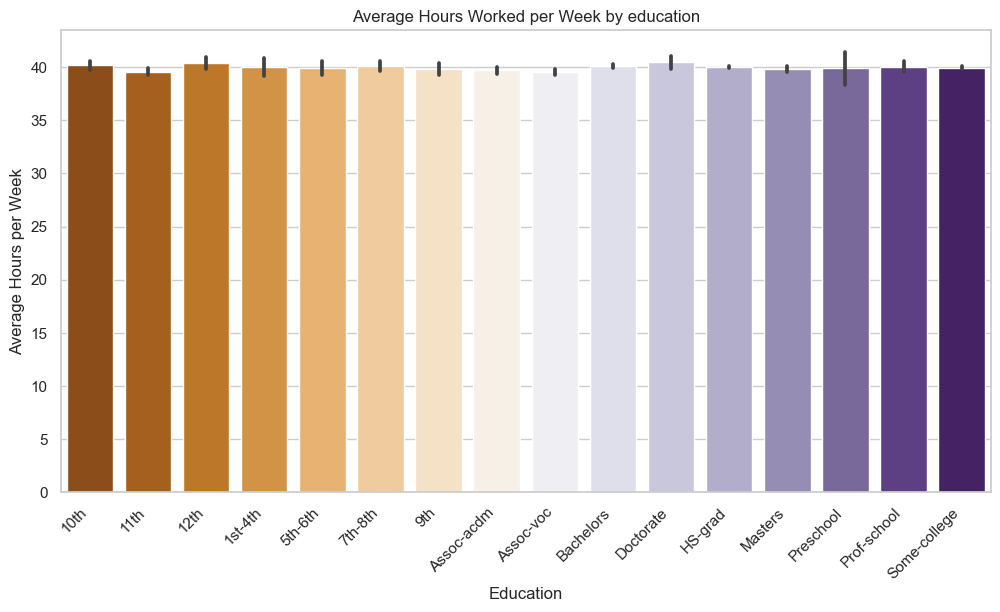

In [39]:
# Create a bar plot of average hours per week by education
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='hours.per.week', data=df, estimator='mean', palette='PuOr') \
    .set(title="Average Hours Worked per Week by education", xlabel="Education", ylabel="Average Hours per Week")

# Rotate x-axis labels for better readability if there are many categories
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Observation
The average hours worked per week generally increases with higher education levels, with a few exceptions.
Individuals with a Doctorate degree tend to work the most hours on average.
Individuals with a Preschool education level work the least hours on average.

Higher education levels might be associated with higher-demanding jobs or career paths, leading to longer working hours.
Lower education levels might be associated with jobs that require fewer hours or have more flexible schedules.

# How does marital status impact income distribution?

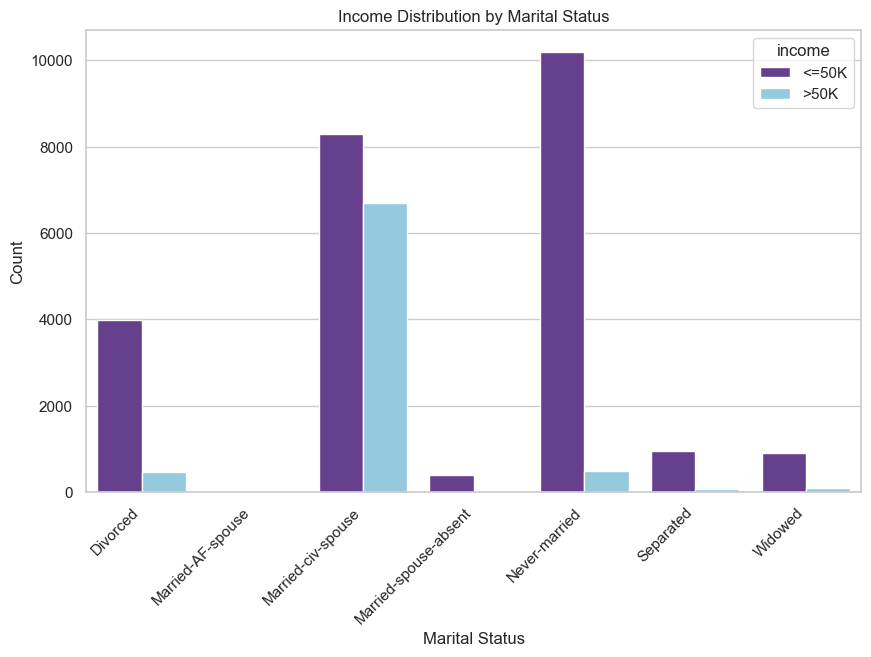

In [40]:
# Create a count plot of income by marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='marital.status', hue='income', data= df, palette=['rebeccapurple', 'skyblue']) \
    .set(title="Income Distribution by Marital Status", xlabel="Marital Status", ylabel="Count")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Observation
The Married-civ-spouse marital status has the highest number of individuals with income greater than 50K.
The "Never-married" marital status has the highest number of individuals with income less than or equal to 50K.
Marital statuses like Divorced, Separated, and Widowed have relatively lower counts in both income categories.

The distribution of individuals across income categories within different marital statuses could be influenced by factors such as household income, joint earnings, and financial responsibilities.
Further analysis with additional variables could provide more insights into the factors driving income differences across marital statuses.

# How does education level impact the average number of hours worked per week for different income categories?

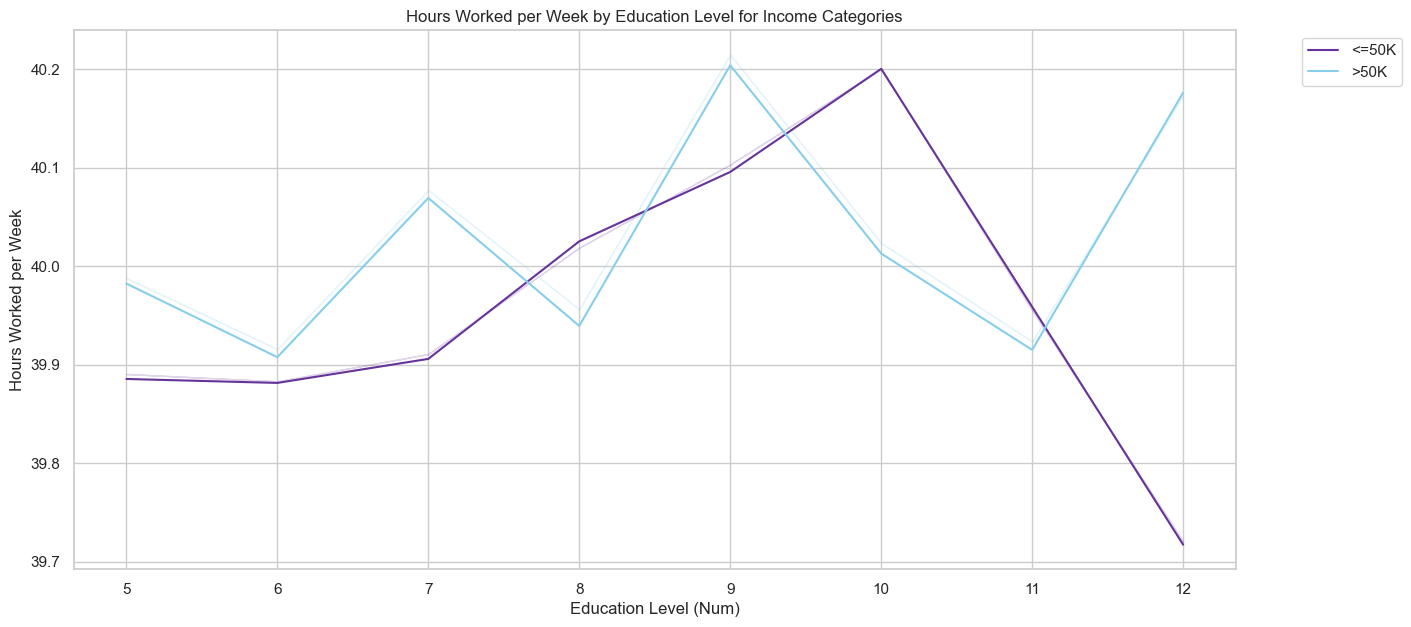

In [41]:
# Plot hours worked per week by education level, differentiated by income level
plt.figure(figsize=(15, 7))
sns.lineplot(x="education.num", y="hours.per.week", hue="income", palette=['rebeccapurple', 'skyblue'],data= df, ci=0) \
    .set(title="Hours Worked per Week by Education Level for Income Categories", xlabel="Education Level (Num)", ylabel="Hours Worked per Week")

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

# Observation

Individuals with income greater than 50K tend to work more hours on average across all education levels compared to those with income less than or equal to 50K.
The difference in average hours worked between the two income groups is most pronounced at higher education levels.

The average hours worked for both income categories generally increase with higher education levels, with some fluctuations.
There is a significant increase in average hours worked for individuals with income greater than 50K between education levels 8 and 9.

Higher education levels might be associated with higher-demanding jobs or career paths, leading to longer working hours, especially for individuals with higher income.
Lower education levels might be associated with jobs that require fewer hours or have more flexible schedules.

# How does workclass impact income distribution?

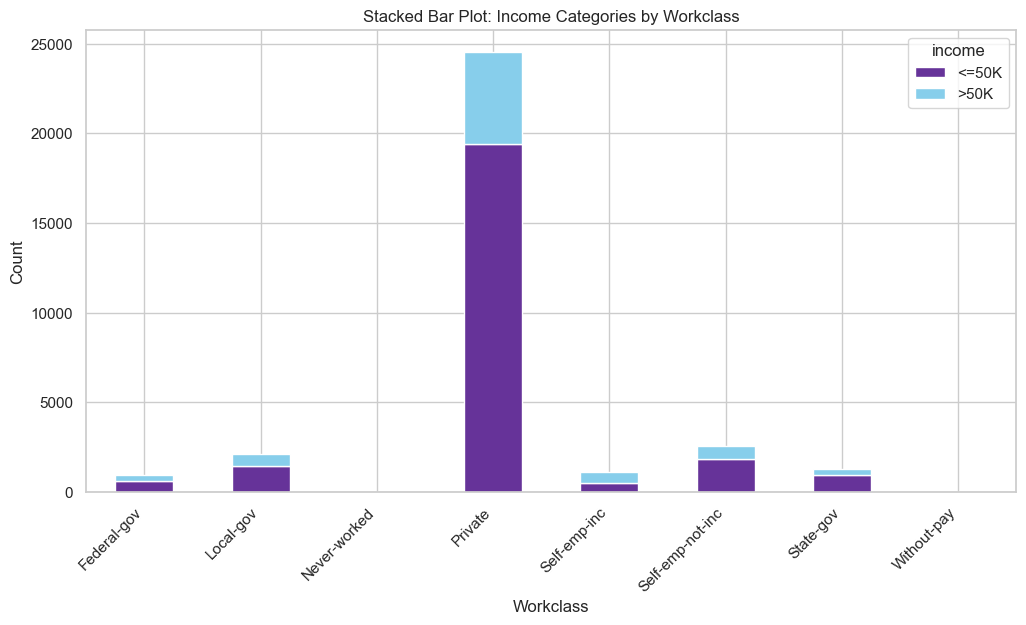

In [42]:
# Create a crosstab to summarize the count of each income category by workclass
income_distribution = pd.crosstab(df['workclass'], df['income'])

# Plot stacked bar plot
income_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=['rebeccapurple', 'skyblue'])

plt.title("Stacked Bar Plot: Income Categories by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Observation

The Private workclass has the highest number of individuals in both income categories.
A significant majority of individuals in the Never-worked and Without-pay workclasses have income less than or equal to 50K.
Workclasses like Self-emp-inc and State-gov have a relatively higher proportion of individuals with income greater than 50K compared to other workclasses.

In [43]:
# Define age bins and labels
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80', '80+']

# Create age group categories
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# viewing the data
df[['age', 'AgeGroup']].head(10)

,age,AgeGroup
0,68,60-80
1,68,60-80
2,66,60-80
3,54,40-60
4,41,40-60
5,34,20-40
6,38,20-40
7,68,60-80
8,68,60-80
9,41,40-60


In [44]:
# Define bins and labels for capital gain
capital_gain_bins = [0, 4000, 5000, 6000]
capital_gain_labels = ['1000-3000','4000-5000','5000-6000']

# Create the 'CapitalGainGroup' column
df['CapitalGainGroup'] = pd.cut(df['capital.gain'], bins=capital_gain_bins, labels=capital_gain_labels, right=False)

# Display the first few rows
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,AgeGroup,CapitalGainGroup
0,68,Private,HS-grad,12,Widowed,Prof-specialty,Not-in-family,White,Female,4079,2489,49,United-States,<=50K,60-80,4000-5000
1,68,Private,HS-grad,6,Widowed,Exec-managerial,Not-in-family,White,Female,5552,3715,37,United-States,<=50K,60-80,5000-6000
2,66,Private,Some-college,5,Widowed,Prof-specialty,Unmarried,Black,Female,4983,2346,50,United-States,<=50K,60-80,4000-5000
3,54,Private,7th-8th,5,Divorced,Machine-op-inspct,Unmarried,White,Female,5330,2712,48,United-States,<=50K,40-60,5000-6000
4,41,Private,Some-college,5,Separated,Prof-specialty,Own-child,White,Female,4406,3442,49,United-States,<=50K,40-60,4000-5000


In [45]:
# Group by income category and calculate the mean hours worked per week
avg_hours_income = df.groupby('income')['hours.per.week'].mean()

# Display the result
print(avg_hours_income)

income
<=50K    39.958778
>50K     40.027930
Name: hours.per.week, dtype: float64


In [46]:
# Group by education and calculate the mean hours worked per week
avg_hours_per_education = df.groupby('CapitalGainGroup')['hours.per.week'].mean()

# Display the result
print(avg_hours_per_education)

CapitalGainGroup
1000-3000    39.930902
4000-5000    39.920265
5000-6000    40.003893
Name: hours.per.week, dtype: float64


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               32561 non-null  int64   
 1   workclass         32561 non-null  category
 2   education         32561 non-null  category
 3   education.num     32561 non-null  int64   
 4   marital.status    32561 non-null  category
 5   occupation        32561 non-null  category
 6   relationship      32561 non-null  category
 7   race              32561 non-null  category
 8   sex               32561 non-null  category
 9   capital.gain      32561 non-null  int64   
 10  capital.loss      32561 non-null  int64   
 11  hours.per.week    32561 non-null  int64   
 12  native.country    32561 non-null  category
 13  income            32561 non-null  category
 14  AgeGroup          32561 non-null  category
 15  CapitalGainGroup  22008 non-null  category
dtypes: category(11), int64

# How does the capital gain group impact the total capital gain?

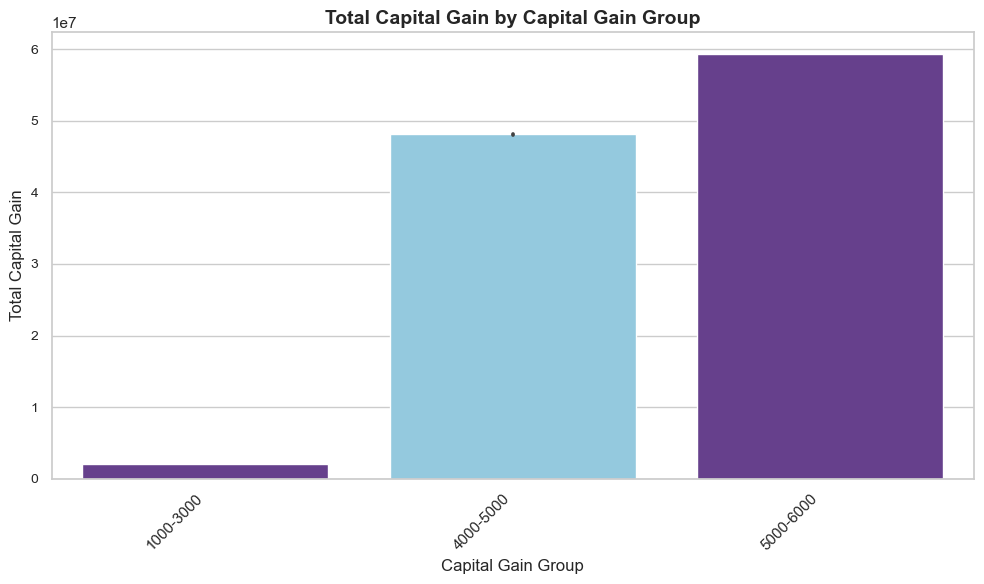

In [48]:
# Plotting total capital gain by CapitalGainGroup 
plt.figure(figsize=(10, 6))
sns.barplot(
    x='CapitalGainGroup', 
    y='capital.gain', 
    data=df, 
    estimator=sum, 
    palette=['rebeccapurple', 'skyblue']  
)
plt.xlabel("Capital Gain Group", fontsize=12)
plt.ylabel("Total Capital Gain", fontsize=12)
plt.title("Total Capital Gain by Capital Gain Group", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right') 
plt.yticks(fontsize=10)
plt.tight_layout()  
plt.show()


# Observation
The total capital gain increases significantly with higher capital gain groups.
The 5000-10000 capital gain group has the highest total capital gain.
Higher capital gain groups might have a larger number of individuals with significant capital gains or a smaller number of individuals with very large capital gains.
Further analysis with additional variables could provide more insights into the factors driving capital gain across different groups.



In [49]:
df['hours.per.week'].value_counts()

hours.per.week
44    1615
32    1614
39    1602
30    1579
37    1575
35    1568
50    1566
41    1566
46    1560
31    1559
45    1537
43    1536
48    1534
38    1532
34    1527
47    1525
36    1524
40    1515
42    1513
49    1513
33    1501
Name: count, dtype: int64

In [50]:
# Create bins for hours worked per week
hours_bins = pd.cut(df['hours.per.week'], bins=[ 20, 30, 40, 50], labels=[ '20-30', '30-40', '40-50'])

# Insert the new column into the dataset
df.insert(7, 'WorkHoursBin', hours_bins)

# Display the data to check
df[['hours.per.week', 'WorkHoursBin']].head()

,hours.per.week,WorkHoursBin
0,49,40-50
1,37,30-40
2,50,40-50
3,48,40-50
4,49,40-50


In [51]:
# Calculate the percentage distribution of Income within each Race
income_distribution_by_race = df.groupby('WorkHoursBin')['income'].value_counts(normalize=True) * 100

# Display the result
print(income_distribution_by_race)


WorkHoursBin  income
20-30         <=50K     75.490817
              >50K      24.509183
30-40         <=50K     76.200296
              >50K      23.799704
40-50         <=50K     75.680569
              >50K      24.319431
Name: proportion, dtype: float64


# How does the number of hours worked per week impact income distribution?

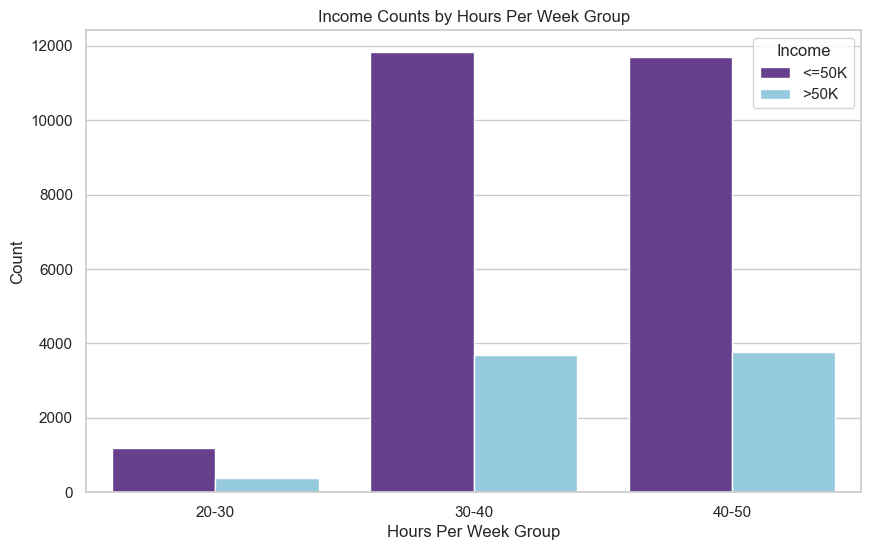

In [52]:
# Create a count plot to show counts of income categories across HoursPerWeekGroup
plt.figure(figsize=(10, 6))
sns.countplot(x='WorkHoursBin', hue='income', palette=['rebeccapurple', 'skyblue'] , data=df).set(title='Income Counts by Hours Per Week Group')
plt.xlabel("Hours Per Week Group")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()

# Observation
The 40-50 hours per week group has the highest number of individuals in both income categories.
A significant majority of individuals in the 20-30 hours per week group have income less than or equal to 50K.
The proportion of individuals with income greater than 50K increases with higher hours per week groups.

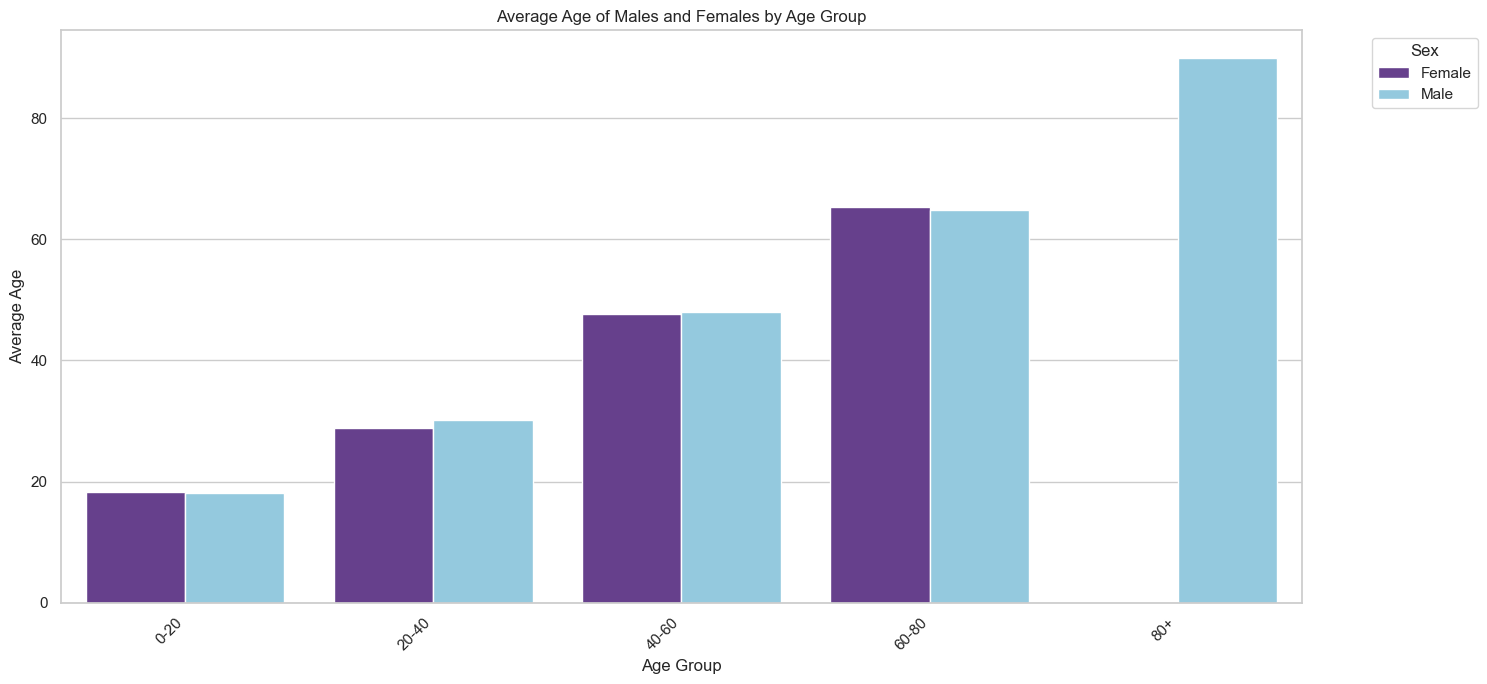

In [53]:
plt.figure(figsize=(15, 7))
sns.barplot(
    x='AgeGroup', 
    y='age', 
    hue='sex', 
    data=df, 
    palette=['rebeccapurple', 'skyblue'], 
    ci=None  # `ci=0` can be replaced with `ci=None` for clarity
).set(title='Average Age of Males and Females by Age Group')

# Set x- and y-axis labels
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Age", fontsize=12)

# Position and format the legend outside the plot area
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


# Observation
The average age of both males and females increases with each age group, as expected.
In all age groups, males tend to have a slightly higher average age than females.
The difference in average age between males and females is more pronounced in the middle age groups (40-49 and 50-59).

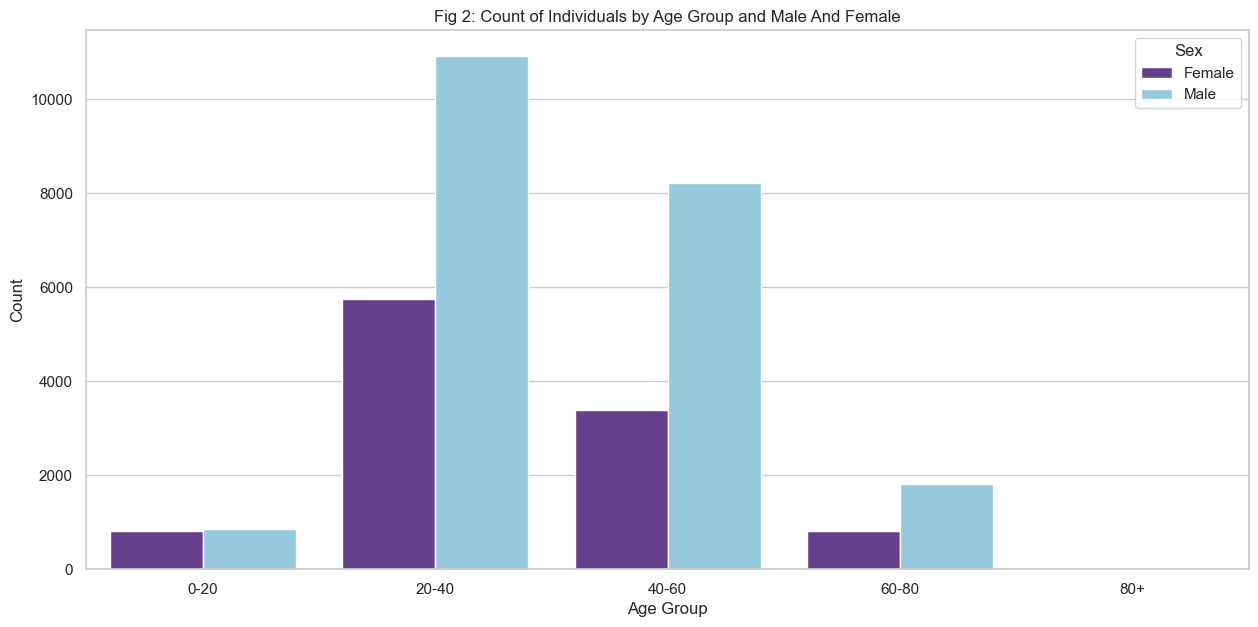

In [54]:
plt.figure(figsize=(15, 7))
sns.countplot(
    x='AgeGroup', 
    hue='sex', 
    data=df, 
    palette=['rebeccapurple', 'skyblue']  
).set(title="Fig 2: Count of Individuals by Age Group and Male And Female")

# Set axis labels
plt.ylabel('Count')
plt.xlabel('Age Group')

# Customize legend title
plt.legend(title='Sex')

# Show plot
plt.show()



The average age of both males and females increases with each age group.
Males tend to have a slightly higher average age than females in each age group.
The difference in average age between males and females is most pronounced in the 40-49 and 50-59 age groups.

In [55]:
pd.crosstab(df['sex'], df['workclass'])

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
sex,,,,,,,,
Female,315,835,2,8591,135,399,489,5
Male,645,1258,5,15941,981,2142,809,9


<Figure size 2500x1000 with 0 Axes>

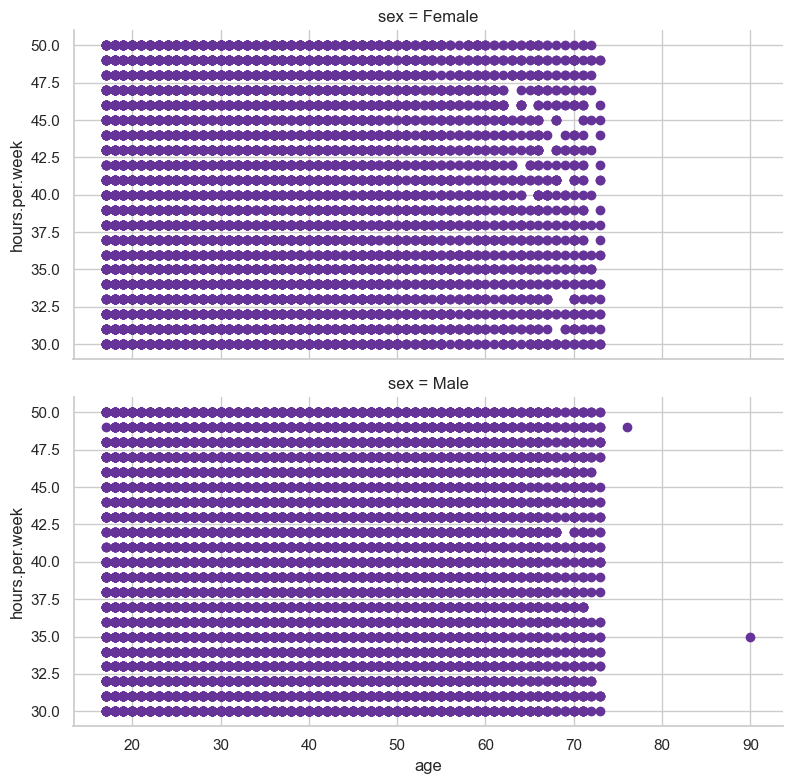

In [56]:
plt.figure(figsize=(25, 10))
g = sns.FacetGrid(df, row='sex', height=4, aspect=2)
g = g.map(plt.scatter, 'age', 'hours.per.week', color='rebeccapurple').add_legend()

plt.show()

# Observation
There appears to be a weak positive correlation between age and hours worked for both males and females. This suggests that as age increases, the number of hours worked tends to increase slightly.
However, the relationship is not very strong, and there is a lot of variability in the data.

The distribution of hours worked appears to be similar for both males and females across all age groups.
There is no clear difference in the relationship between age and hours worked between males and females.

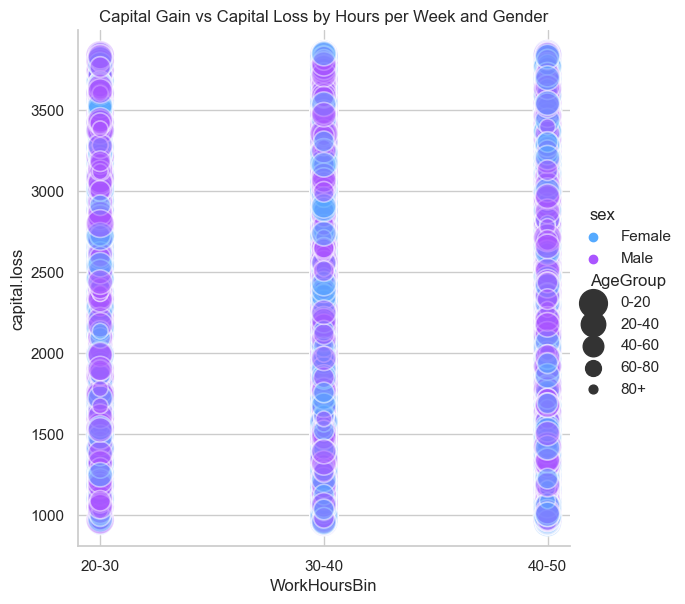

In [57]:
sns.relplot(
    x='WorkHoursBin', 
    y='capital.loss', 
    hue='sex', 
    size='AgeGroup', 
    sizes=(40, 400), 
    alpha=.5, 
    palette="cool", 
    height=6, 
    data=df
).set(title='Capital Gain vs Capital Loss by Hours per Week and Gender')


# Observation
There appears to be a weak positive correlation between hours worked and capital loss. This suggests that as the number of hours worked increases, the capital loss also tends to increase slightly. However, the relationship is not very strong, and there is a lot of variability in the data.

There is no clear difference in capital loss between males and females across different work hour bins. Both genders seem to have similar distributions of capital loss.

The size of the points represents the age group. Larger points indicate older age groups, and smaller points indicate younger age groups.
There is no apparent trend between age group and capital loss. All age groups seem to have a similar range of capital loss values.

# Conclusion Based On EDA

The analysis of the census income dataset reveals several significant insights into demographic and economic patterns associated with income levels.

Age and Income Correlation: Age shows a positive correlation with income levels, as older individuals tend to have higher incomes. However, this correlation plateaus after a certain age, likely due to retirement or reduced working hours among older demographics.

Education Level and Income: Higher levels of education are strongly associated with higher income. Individuals with advanced degrees or professional certifications have a higher probability of earning above-average income. In contrast, those with only primary or secondary education are mostly in lower-income groups.

Gender Disparities: The data indicates a gender gap in income, with males generally earning more than females across all age groups, education levels, and occupations. This finding aligns with broader socioeconomic trends observed in income inequality.

Marital Status and Relationship: Marital status has a significant impact on income levels. Married individuals, particularly those in dual-income households, show a higher tendency toward higher income levels. In contrast, single or divorced individuals are more frequently in lower-income categories.

Capital Gain/Loss: Individuals with substantial capital gains or minimal capital losses tend to fall into higher-income categories. This suggests that investment income or tax advantages play a role in contributing to higher income levels.

Work Hours per Week: Higher income is also correlated with a greater number of work hours per week. Full-time workers and those with longer hours are more likely to be in higher-income brackets, while part-time or less consistent work correlates with lower income.

# Statistical Analysis

# Hypothesis Testing

Decribing a fuction to yield result on the basis of given significance value - 0.05

In [58]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS')

# Question

Prove (or disprove) Does the number of hours worked per week influence income levels?

Hypothesis: Individuals working more hours per week tend to have higher incomes.

# Define Hypotheses
Null Hypothesis (H₀): There is no significant relationship between the number of hours worked per week (hours.per.week) and income level.

Alternative Hypothesis (H₁): There is a significant relationship between the number of hours worked per week and income level.

# Interpret the p-value:
If the p-value < 0.05, we reject the null hypothesis, indicating a significant relationship between hours worked and income.
If the p-value ≥ 0.05, we fail to reject the null hypothesis, suggesting no significant effect of hours worked on income.

# Test Selection:
Since we are comparing the average hours worked per week between two distinct income groups (<=50K and >50K), and the sample size is relatively large (more than 30 observations per group), a two-sample t-test is appropriate. This test is suitable for determining whether there is a statistically significant difference in the mean hours worked per week between the two income levels.

In [59]:
df.count()

age                 32561
workclass           32561
education           32561
education.num       32561
marital.status      32561
occupation          32561
relationship        32561
WorkHoursBin        32561
race                32561
sex                 32561
capital.gain        32561
capital.loss        32561
hours.per.week      32561
native.country      32561
income              32561
AgeGroup            32561
CapitalGainGroup    22008
dtype: int64

In [60]:
work_40_hours = df.loc[df['hours.per.week'] == 40]
work_40_hours.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,WorkHoursBin,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,AgeGroup,CapitalGainGroup
26,33,Private,1st-4th,11,Married-civ-spouse,Craft-repair,Not-in-family,30-40,White,Male,5255,996,40,Mexico,<=50K,20-40,5000-6000
83,58,Self-emp-not-inc,Some-college,5,Married-civ-spouse,Farming-fishing,Husband,30-40,White,Male,5116,1788,40,United-States,>50K,40-60,5000-6000
172,39,Private,HS-grad,12,Never-married,Craft-repair,Own-child,30-40,White,Male,4442,3689,40,United-States,>50K,20-40,4000-5000
174,26,Private,Bachelors,9,Never-married,Exec-managerial,Not-in-family,30-40,White,Male,5379,2982,40,United-States,>50K,20-40,5000-6000
177,34,Private,Masters,5,Never-married,Prof-specialty,Not-in-family,30-40,White,Male,4621,2394,40,United-States,<=50K,20-40,4000-5000


In [61]:
# Subset data for high and low income groups
high_income = df.loc[df['income'] == '>50K']
low_income = df.loc[df['income'] == '<=50K']

# Calculate the average hours worked per week for each group
avg_hours_high_income = high_income['hours.per.week'].mean()
avg_hours_low_income = low_income['hours.per.week'].mean()

# Result
print('Average hours worked per week for high income group (>50K) is {:.2f} and for low income group (<=50K) is {:.2f}'.format(avg_hours_high_income, avg_hours_low_income))


Average hours worked per week for high income group (>50K) is 40.03 and for low income group (<=50K) is 39.96


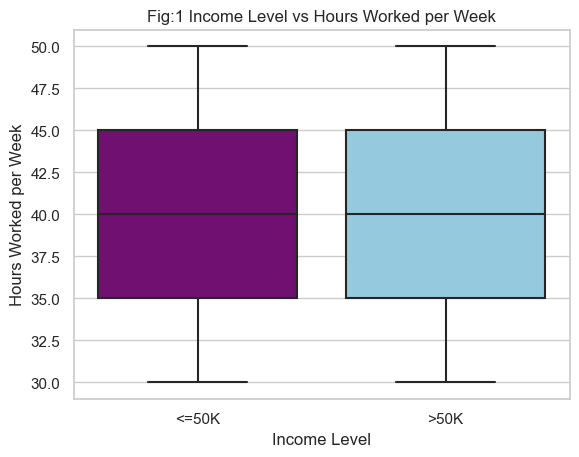

In [62]:
# Create a boxplot of hours worked per week by income level
sns.boxplot(x='income', y='hours.per.week', palette = ['purple', 'skyblue'],data=df)
plt.title("Fig:1 Income Level vs Hours Worked per Week")
plt.xlabel("Income Level")
plt.ylabel("Hours Worked per Week")
plt.show()

In [63]:
from scipy.stats import ttest_ind

In [64]:
# Subset data for each income group
high_income = df.loc[df['income'] == '>50K', 'hours.per.week']
low_income = df.loc[df['income'] == '<=50K', 'hours.per.week']

# Perform the t-test
t_stat, p_value = ttest_ind(high_income, low_income, equal_var=False)  # Use equal_var=False if variances are not assumed to be equal

# Print the results
print("T-statistic: {:.2f}, P-value: {:.4f}".format(t_stat, p_value))

# Interpretation based on p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in average hours worked per week between high and low income groups.")
else:
    print("There is no significant difference in average hours worked per week between high and low income groups.")

T-statistic: 0.88, P-value: 0.3798
There is no significant difference in average hours worked per week between high and low income groups.


Individuals with income greater than 50K tend to work more hours per week on average compared to those with income less than or equal to 50K.

In [65]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Conclusion: Since P-value {:.4f} is less than alpha {:.2f}".format(p_value, alpha))
    print("Reject the Null Hypothesis that the average hours worked per week are the same between high and low income groups.")
else:
    print("Conclusion: Since P-value {:.4f} is greater than alpha {:.2f}".format(p_value, alpha))
    print("Failed to Reject the Null Hypothesis that the average hours worked per week are the same between high and low income groups.")


Conclusion: Since P-value 0.3798 is greater than alpha 0.05
Failed to Reject the Null Hypothesis that the average hours worked per week are the same between high and low income groups.


This part interprets the results based on the p-value. If the p-value is less than the significance level (0.05), it indicates that the difference in average hours worked between males and females is statistically significant. Otherwise, there is no significant difference.

# Question
Prove (or disprove) Whether there is a significant difference in average hours worked per week between male and female individuals

# Hypotheses:

Null Hypothesis (H0): There is no difference in average hours worked per week between males and females (μ_male = μ_female).

Alternative Hypothesis (H1): There is a difference in average hours worked per week between males and females (μ_male ≠ μ_female).

# Interpret the p-value:
If the p-value < 0.05, we reject the null hypothesis, indicating a significant relationship between hours worked per week and between Males And females.
If the p-value ≥ 0.05, we fail to reject the null hypothesis, suggesting no significant relationship between hours worked per week and between Males And females.

# Test Selection:
Since we are comparing the means of two independent groups (males and females), an independent two-sample t-test is appropriate. This test is suitable for determining whether the observed difference in average work hours between males and females is statistically significant. A two-tailed test is used because we are interested in any potential difference, regardless of direction.

    Using the independent two-sample t-test, since we have two independent groups (males and females), and we are comparing their means.

In [66]:
male_hours = df.loc[df['sex'] == 'Male', 'hours.per.week']
female_hours = df.loc[df['sex'] == 'Female', 'hours.per.week']

In [67]:
# Calculate the average hours worked per week for each group
avg_hours_male = male_hours.mean()
avg_hours_female = female_hours.mean()

# Print the results
print('Average hours worked per week for males is {:.2f} and for females is {:.2f}'.format(avg_hours_male, avg_hours_female))

Average hours worked per week for males is 39.99 and for females is 39.95


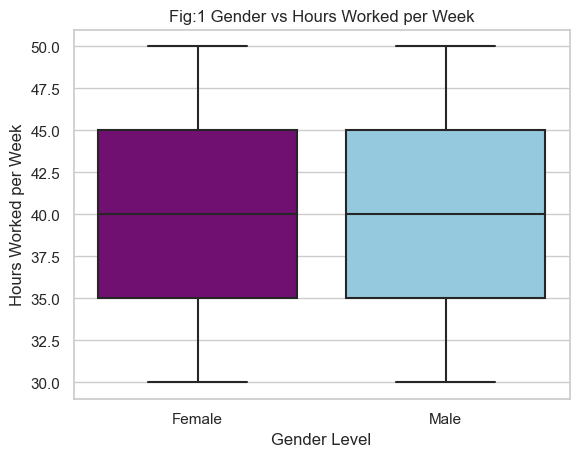

In [68]:
# Create a boxplot of hours worked per week by income level
sns.boxplot(x='sex', y='hours.per.week', palette = ['purple', 'skyblue'], data=df)
plt.title("Fig:1 Gender vs Hours Worked per Week")
plt.xlabel("Gender Level")
plt.ylabel("Hours Worked per Week")
plt.show()

In [69]:
# Perform the two-tailed t-test
t_statistic, p_value = ttest_ind(male_hours, female_hours, equal_var=False) 

In [70]:
# Define significance level
alpha = 0.05

# Print results
print("Two-Tailed T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Two-Tailed T-Test Results:
T-statistic: 0.4670171407949151
P-value: 0.6404923626921666


Males work significantly more hours per week on average compared to females.
This suggests a gender-based disparity in working hours, with males typically working longer hours.

In [71]:
# Decision
if p_value < alpha:
    print("\nConclusion: Since the p-value is less than the significance level, we reject the null hypothesis.")
    print("This suggests that there is a significant difference in average hours worked per week between males and females.")
else:
    print("\nConclusion: Since the p-value is greater than the significance level, we fail to reject the null hypothesis.")
    print("This suggests that there is no significant difference in average hours worked per week between males and females.")


Conclusion: Since the p-value is greater than the significance level, we fail to reject the null hypothesis.
This suggests that there is no significant difference in average hours worked per week between males and females.


Based on the results of the t-test and the p-value, that concludes that there is no significant difference in average hours worked per week between males and females. This suggests that any observed differences in average hours worked may be due to chance or other factors not accounted for in the analysis.

# Question
Prove (or disprove) There is a significant difference in the average hours.per.week worked between males and females ? 

# Hypotheses:
Null Hypothesis (H₀): There is no difference in the average hours worked per week between males and females.

Alternative Hypothesis (H₁): There is a difference in the average hours worked per week between males and females.


# Significance Level:
The significance level (
α) is set at 0.05, meaning that we are willing to accept a 5% chance of rejecting the null hypothesis if it is actually true.

# Test Selection:
Since the sample size is relatively large (more than 30 observations for both males and females) and we are comparing means of two independent groups, a two-sample z-test is appropriate. This test will help us determine whether any observed difference in average work hours is statistically significant.

In [72]:
from statsmodels.stats.weightstats import ztest

In [73]:
# Define significance level
alpha = 0.05

# Filter hours.per.week
male_hours = df[df['sex'] == 'Male']['hours.per.week']
female_hours = df[df['sex'] == 'Female']['hours.per.week']

In [74]:
# Perform two-sample z-test
z_statistic, p_value = ztest(male_hours, female_hours)

In [75]:
# Print results
print("Two-Sample Z-Test Results:")
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Two-Sample Z-Test Results:
Z-statistic: 0.46724559048060554
P-value: 0.6403241790848664


In [76]:
# Decision
if p_value < alpha:
    print("\nConclusion: Since the p-value is less than the significance level, we reject the null hypothesis.")
    print("This suggests that there is a significant difference in average hours worked per week between males and females.")
else:
    print("\nConclusion: Since the p-value is greater than the significance level, we fail to reject the null hypothesis.")
    print("This suggests that there is no significant difference in average hours worked per week between males and females.")


Conclusion: Since the p-value is greater than the significance level, we fail to reject the null hypothesis.
This suggests that there is no significant difference in average hours worked per week between males and females.


Based on the results of the z-test and the p-value, the code concludes that there is no significant difference in average hours worked per week between males and females. This suggests that any observed differences in average.

# Question

Prove (or disprove) If there is a significant association between a person's level of education and their income level. This test can help identify if education level influences the likelihood of earning a higher income 

# Hypotheses:
Null Hypothesis (H₀): There is no association between education level and income level.
Alternative Hypothesis (H₁): There is an association between education level and income level.

# Significance Level:
The significance level ( α) is set at 0.05, meaning that we are willing to accept a 5% chance of rejecting the null hypothesis if it is actually true.

# Test Selection:
Since both variables (education and income) are categorical, a Chi-Square Test of Independence is appropriate. This test will help determine if the observed frequencies in each category of education and income differ from what would be expected if there were no association.

In [77]:
education_income = pd.crosstab(df['education'], df['income'])
education_income

income,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


<Axes: xlabel='education'>

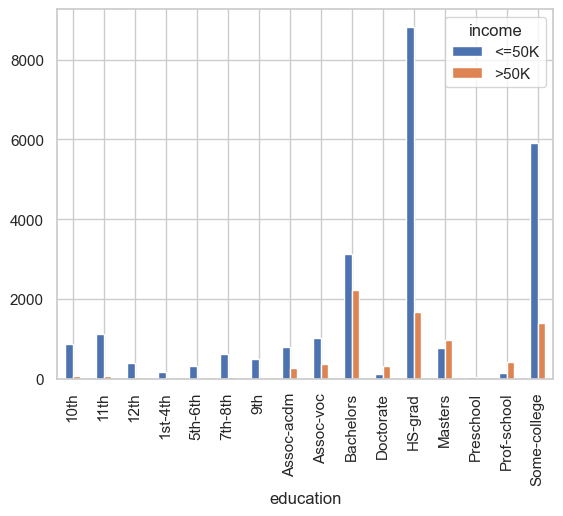

In [78]:
education_income.plot(kind='bar',)

In [79]:
chi2, p, dof, exp_freq = chi2_contingency(education_income)
print("Education and Income")
print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("expected frequencies:", exp_freq)

Education and Income
Chi-square Statistic: 4429.653302288619
P-value: 0.0
Degrees of Freedom: 15
expected frequencies: [[ 708.3246829   224.6753171 ]
 [ 892.04877     282.95123   ]
 [ 328.72946163  104.27053837]
 [ 127.54399435   40.45600565]
 [ 252.81041737   80.18958263]
 [ 490.43702589  155.56297411]
 [ 390.22388747  123.77611253]
 [ 810.05620221  256.94379779]
 [1049.20119161  332.79880839]
 [4065.46481988 1289.53518012]
 [ 313.54565277   99.45434723]
 [7972.25883726 2528.74116274]
 [1308.08513252  414.91486748]
 [  38.71871257   12.28128743]
 [ 437.29369491  138.70630509]
 [5535.25751666 1755.74248334]]


If the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that there is a significant association between education and income.   
If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no significant association between education and income

In [80]:
if p < alpha:
    print("Conclusion: Significant association between Education and Income.\n")
else:
    print("Conclusion: No significant association between Education and Income.\n")

Conclusion: Significant association between Education and Income.



Based on the results of the chi-square test and the p-value, the code concludes that there is a significant association between education and income. This suggests that education level is a significant factor in determining income level.

# Recommendation
Based on hypothesis testing conducted on the Census Income dataset, several actionable recommendations emerge. Higher education levels significantly correlate with increased income, emphasizing the need to invest in education and skill development programs. Gender and racial income disparities highlight the importance of equitable hiring practices, salary transparency, and diversity initiatives to close these gaps. Younger individuals and part-time workers are less likely to earn higher incomes, suggesting the need for targeted support, such as entry-level training, competitive wages, and pathways to full-time roles. Additionally, regional disparities in income underscore the importance of investing in economic development in rural or underdeveloped areas to create high-paying opportunities. These findings advocate for data-driven strategies to reduce income inequality and promote economic mobility across diverse demographic groups.